In [1]:
import nbformat
from IPython import get_ipython
import pandas as pd

import glob
import os
import fnmatch
import matplotlib.pyplot as plt



In [2]:
#### FOR TREMORRRRRRRRRRRR

In [3]:
def return_csv_files(base_dir, pattern):
    return[
    os.path.join(base_dir, file)
    for file in os.listdir(base_dir)
    if fnmatch.fnmatch(file.lower(), pattern)]
    

In [4]:
base_dir = 'synapse_data/Version_1/pd_participants/csv_files'
self_pattern = '*_selfpace.csv'

csv_files = return_csv_files(base_dir, self_pattern)

print(csv_files)

['synapse_data/Version_1/pd_participants/csv_files/NLS002_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS005_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS022_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS036_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS102_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS121_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS127_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS130_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS135_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS141_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS142_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS143_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS144_SelfPace.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS146_SelfPa

In [5]:
base_dir = 'synapse_data/Version_1/pd_participants/csv_files'
tand_pattern = '*_tandemgait.csv'

tandemgait_csv_files = return_csv_files(base_dir, tand_pattern)

print(tandemgait_csv_files)

['synapse_data/Version_1/pd_participants/csv_files/NLS002_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS005_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS022_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS036_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS102_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS121_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS127_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS130_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS135_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS141_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS142_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS143_TandemGait.csv', 'synapse_data/Version_1/pd_participants/csv_files/NLS144_TandemGait.csv', 'synapse_data/Version_1/pd_participan

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS002_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

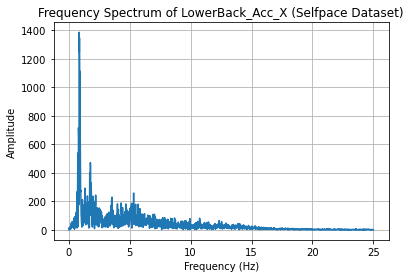

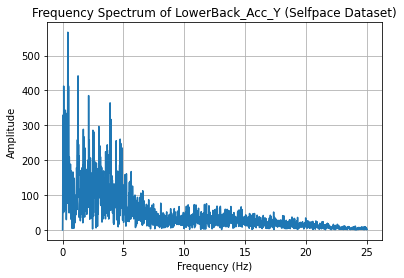

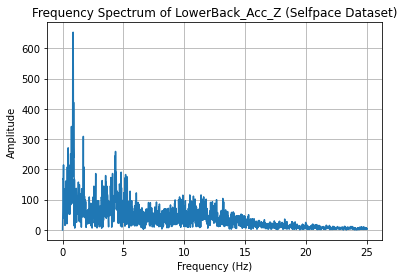

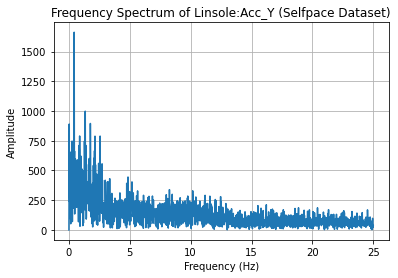

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

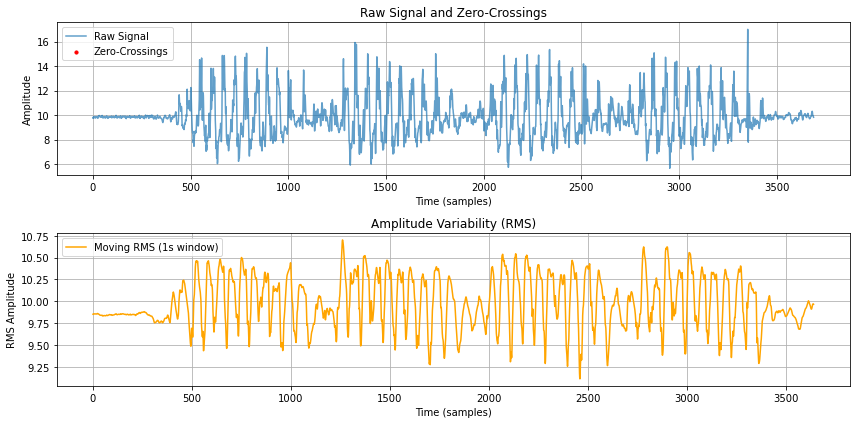

36382.299289

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

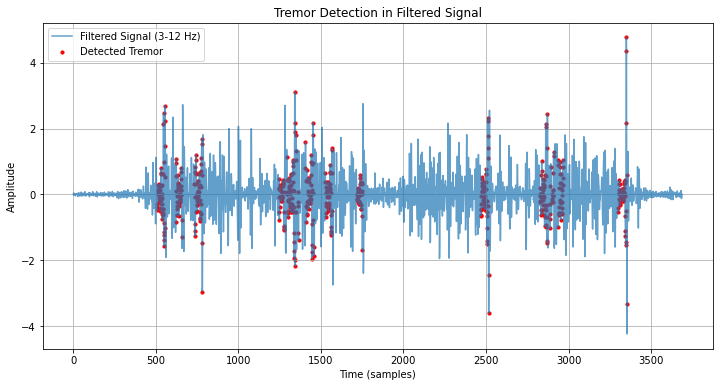

(558, 15.126050420168067)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

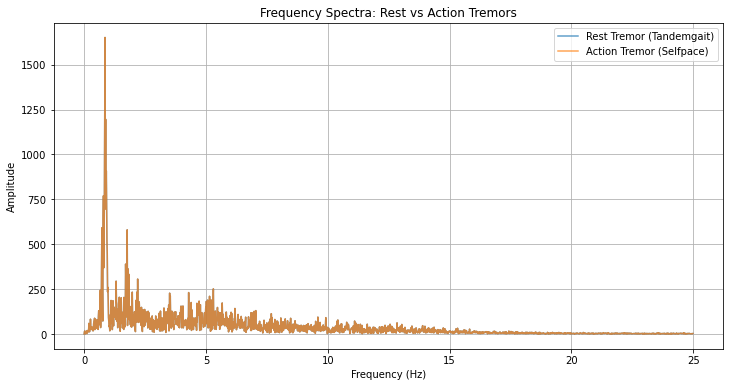

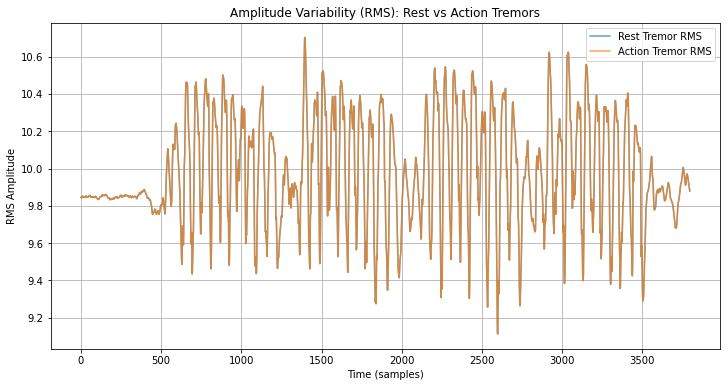

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_cla

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


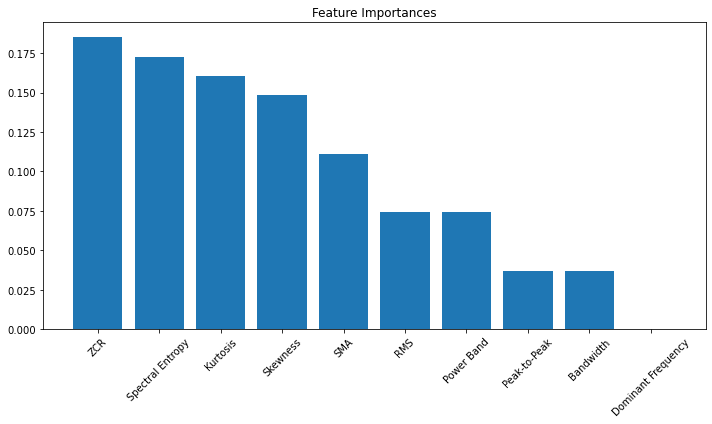

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('ZCR', 0.18518518518518517),
  ('Spectral Entropy', 0.1728395061728395),
  ('Kurtosis', 0.16049382716049385),
  ('Skewness', 0.14814814814814814),
  ('SMA', 0.1111111111111111),
  ('Power Band', 0.07407407407407407),
  ('RMS', 0.07407407407407407),
  ('Bandwidth', 0.037037037037037035),
  ('Peak-to-Peak', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS005_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'selfpace':            Time GeneralEvent ClinicalEvent  L Foot Contact  R Foot Contact  \
0         0 sec     Standing     unlabeled               0               0   
1      0.01 sec     Standing     unlabeled               0               0   
2      0.02 sec     Standing     unlabeled               0               0   
3      0.03 sec     Standing     unlabeled               0               0   
4      0.04 sec     Standing     unlabeled               0               0   
...         ...          ...           ...             ...             ...   
7449  74.49 sec         Turn     unlabeled               0               0   
7450   74.5 sec         Turn     unlabeled               0               0   
7451  74.51 sec         Turn     unlabeled               0               0   
7452  74.52 sec         Turn     unlabeled               0               0   
7453  74.53 sec         Turn     unlabeled               0               0   

      L Foot Pressure  R Foot Pressure Walkway_X W

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
67        Linsole:Acc_Y        Linsole:Acc_Y
68        Linsole:Acc_Z        Linsole:Acc_Z
69        Rinsole:Acc_X        Rinsole:Acc_X
70        Rinsole:Acc_Y        Rinsole:Acc_Y
71        Rinsole:Acc_Z        Rinsole:Acc_Z

[72 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

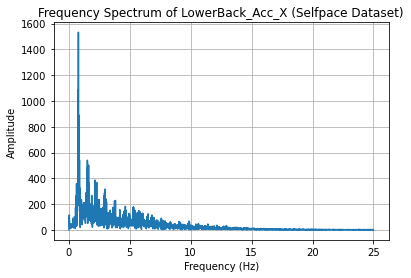

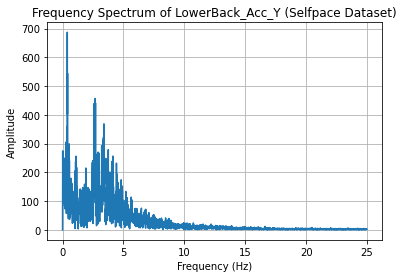

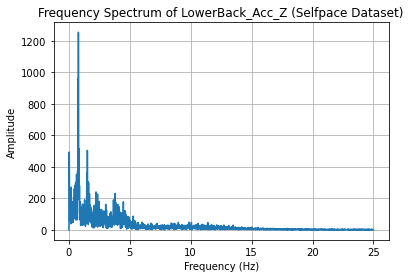

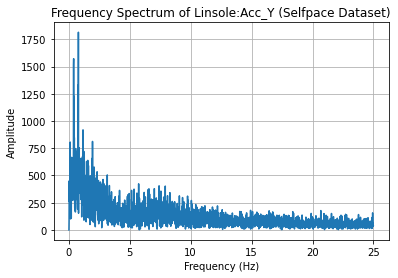

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

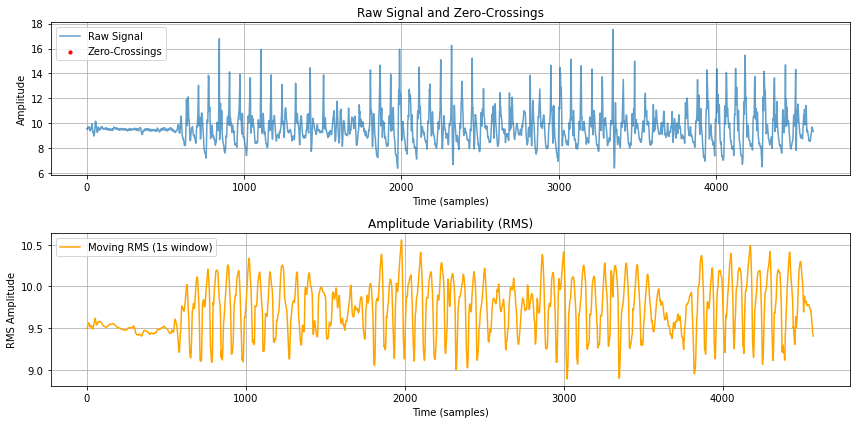

44582.566317000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

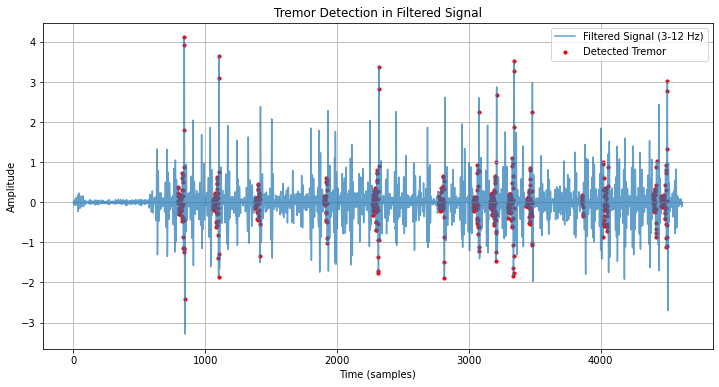

(587, 12.705627705627705)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

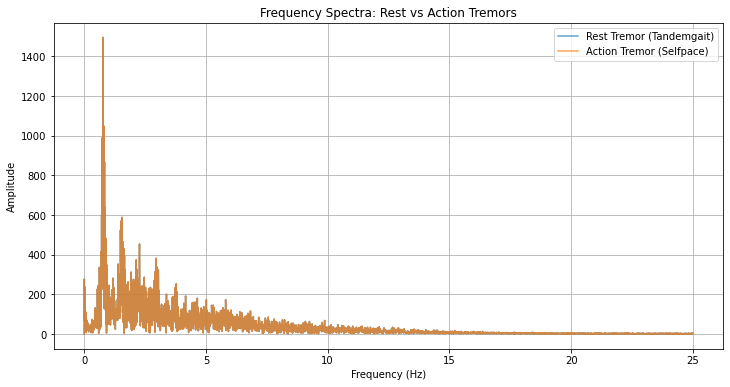

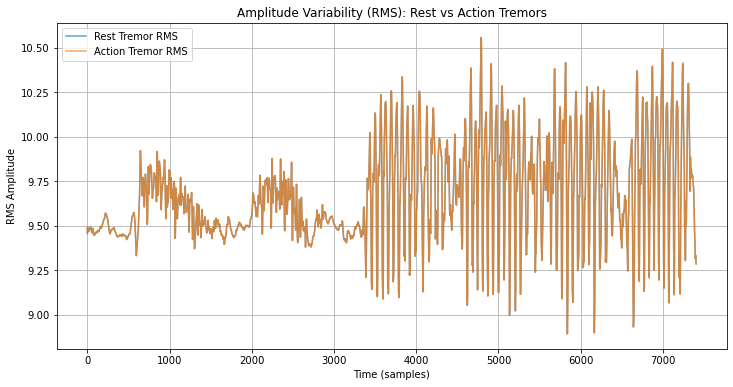

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Skipping file due to insufficient samples.
Executing cell:
# Simplify the hyperparameter grid to speed up the process
simplified_param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [10, 20],  # Maximum depth of trees
    'max_features': ['sqrt'],  # Use sqrt for features per split
}

# Reinitialize GridSearchCV with a smaller parameter grid
simplified_grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=simplified_param_grid, 
    cv=3,  # Reduce number of folds for simplicity
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# Perform the simplified grid search on the training data
simplified_grid_search.fit(X_train_opt, y_train_opt)

# Extract the best model and parameters
best_rf_model_simplified = simplified_grid_search.best_estimator_
best_params_simplified = simplified_grid_search.best_params_
best_score_simplified = simplified_grid_search.best_score_

# Evaluate the tuned model on the test set
y_pred_simplified = best_rf_model

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


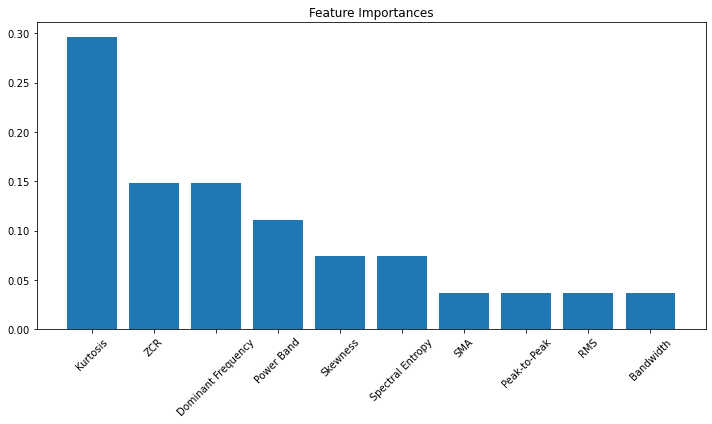

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Dominant Frequency', 0.14814814814814817),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Spectral Entropy', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('Bandwidth', 0.03703703703703704),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('SMA', 0.03703703703703704)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS022_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

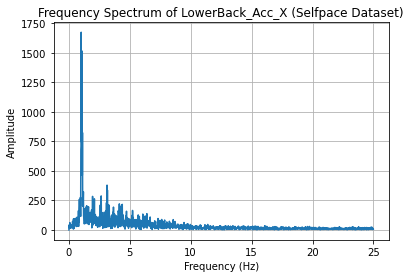

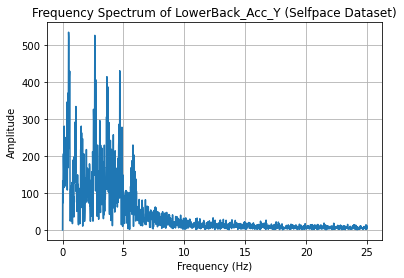

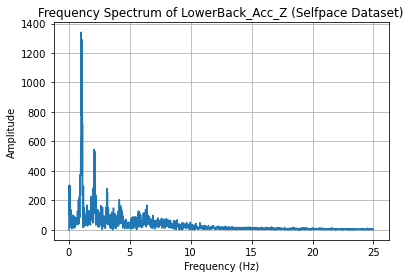

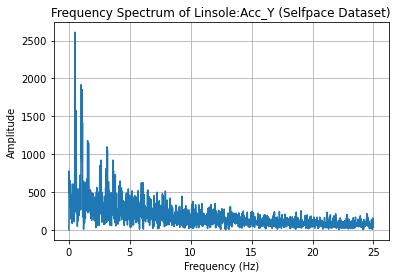

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

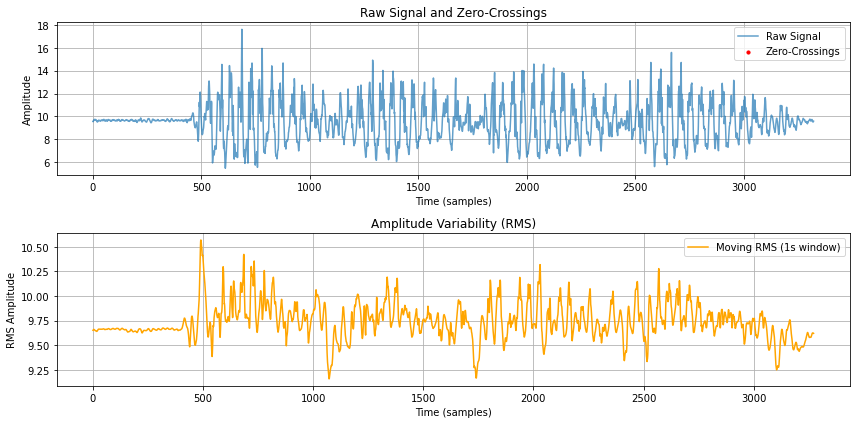

31893.322063

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

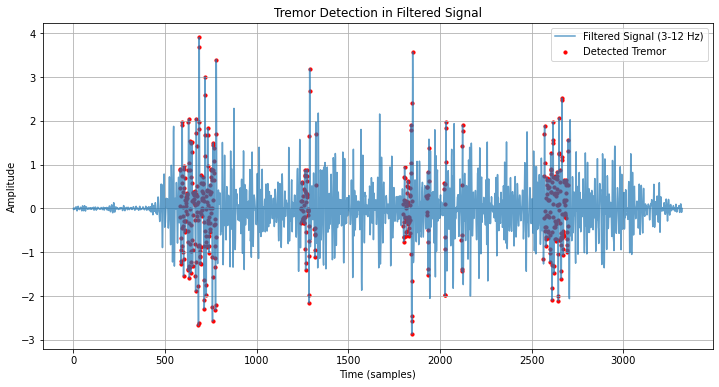

(478, 14.388922335942203)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

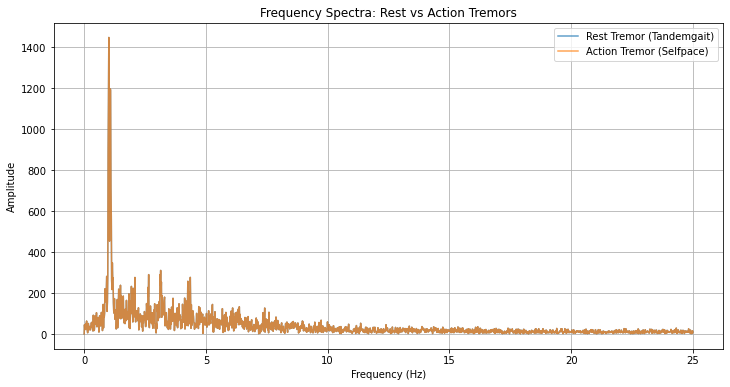

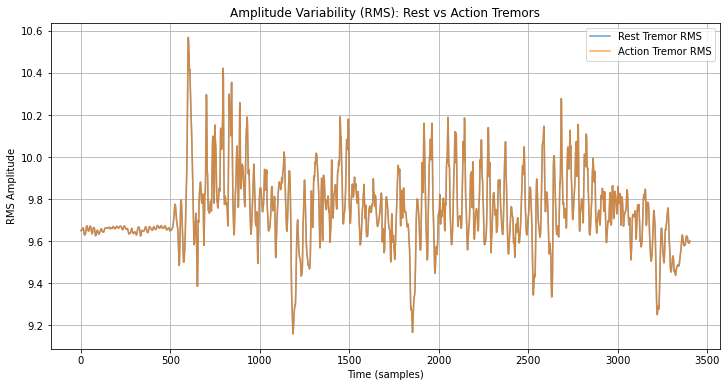

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


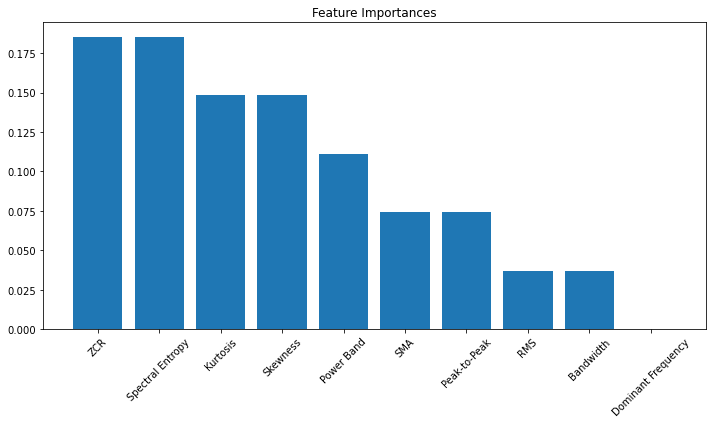

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Spectral Entropy', 0.18518518518518517),
  ('ZCR', 0.18518518518518517),
  ('Skewness', 0.14814814814814814),
  ('Kurtosis', 0.14814814814814814),
  ('Power Band', 0.1111111111111111),
  ('Peak-to-Peak', 0.07407407407407407),
  ('SMA', 0.07407407407407407),
  ('Bandwidth', 0.037037037037037035),
  ('RMS', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS036_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

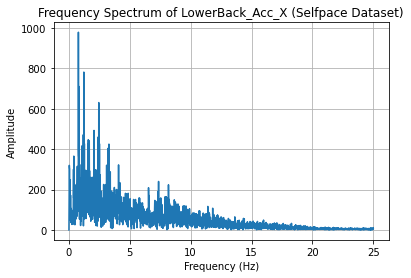

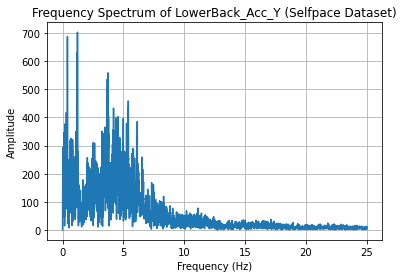

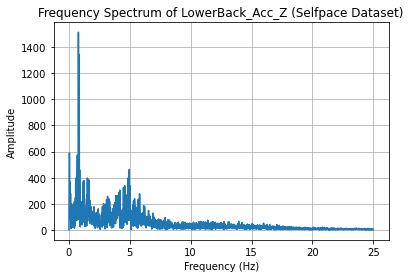

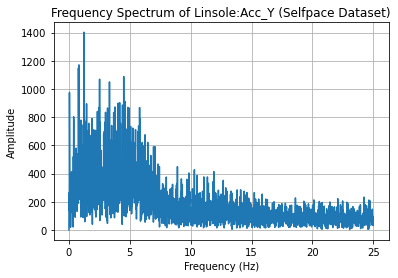

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

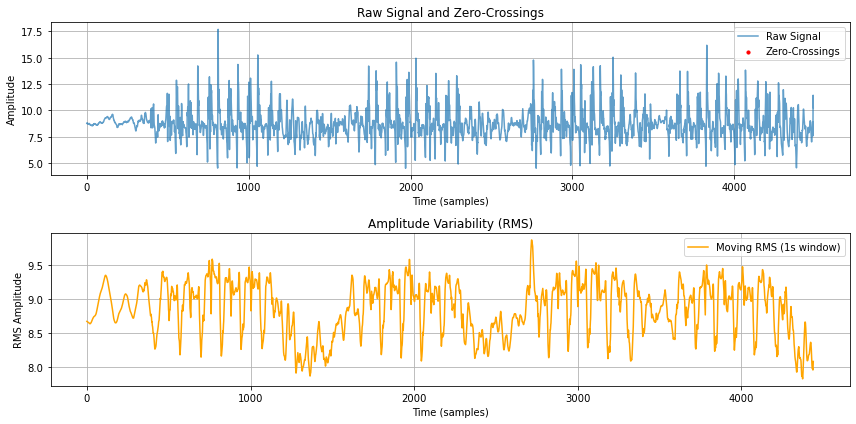

39289.078001999995

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

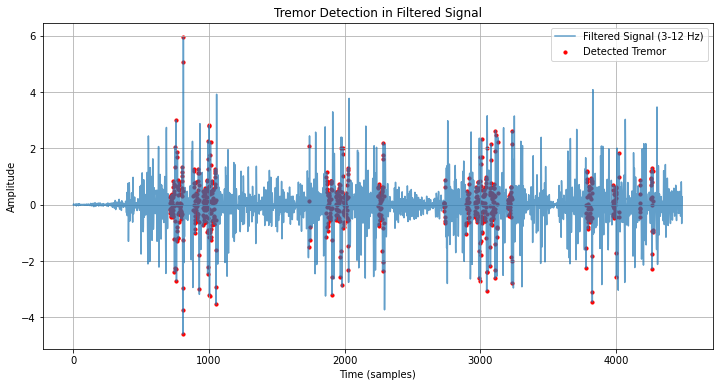

(729, 16.23969703720205)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

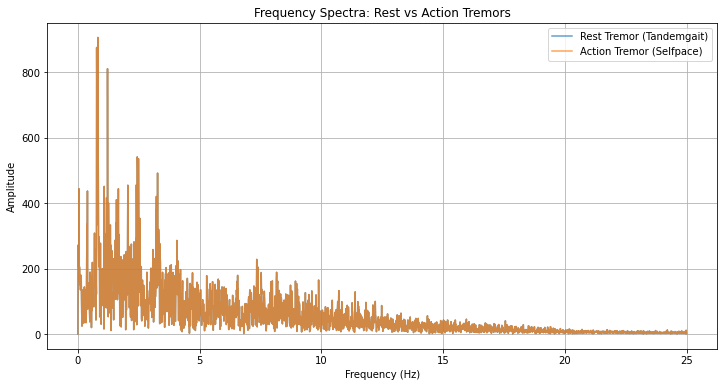

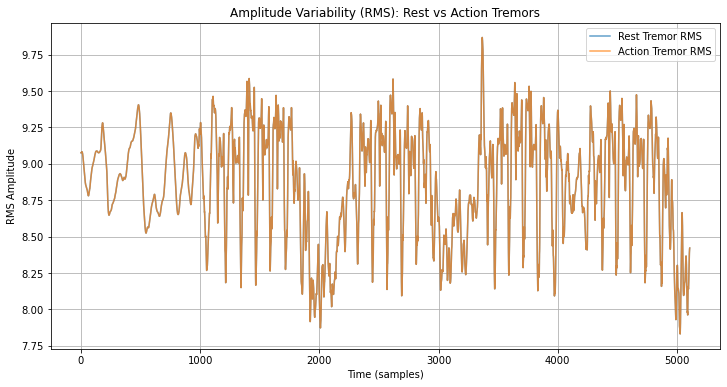

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


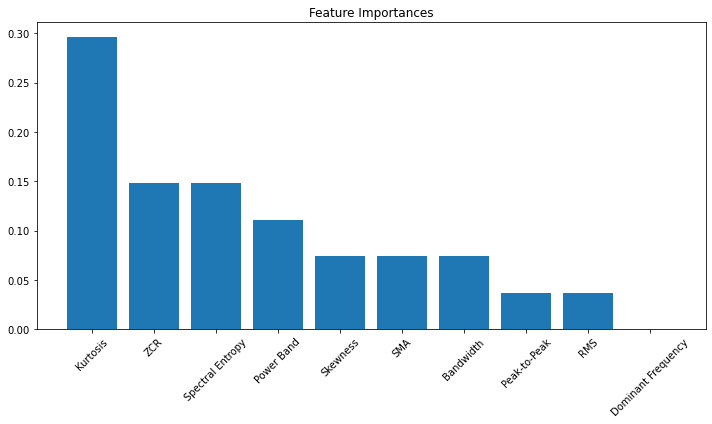

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Spectral Entropy', 0.14814814814814817),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Bandwidth', 0.07407407407407408),
  ('SMA', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS102_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'selfpace':            Time GeneralEvent ClinicalEvent  L Foot Contact  R Foot Contact  \
0         0 sec     Standing     unlabeled               0               0   
1      0.01 sec     Standing     unlabeled               0               0   
2      0.02 sec     Standing     unlabeled               0               0   
3      0.03 sec     Standing     unlabeled               0               0   
4      0.04 sec     Standing     unlabeled               0               0   
...         ...          ...           ...             ...             ...   
4204  42.04 sec         Turn     unlabeled               0               0   
4205  42.05 sec         Turn     unlabeled               0               0   
4206  42.06 sec         Turn     unlabeled               0               0   
4207  42.07 sec         Turn     unlabeled               0               0   
4208  42.08 sec         Turn     unlabeled               0               0   

      L Foot Pressure  R Foot Pressure Walkway_X W

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

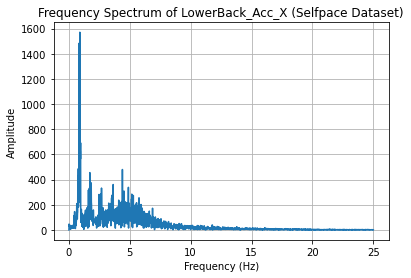

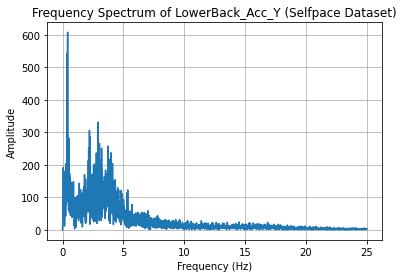

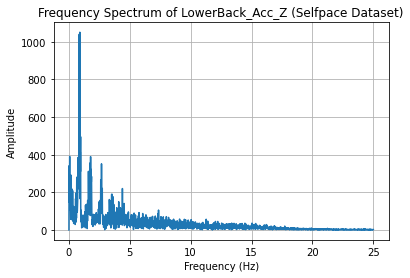

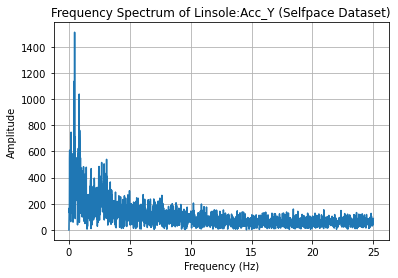

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

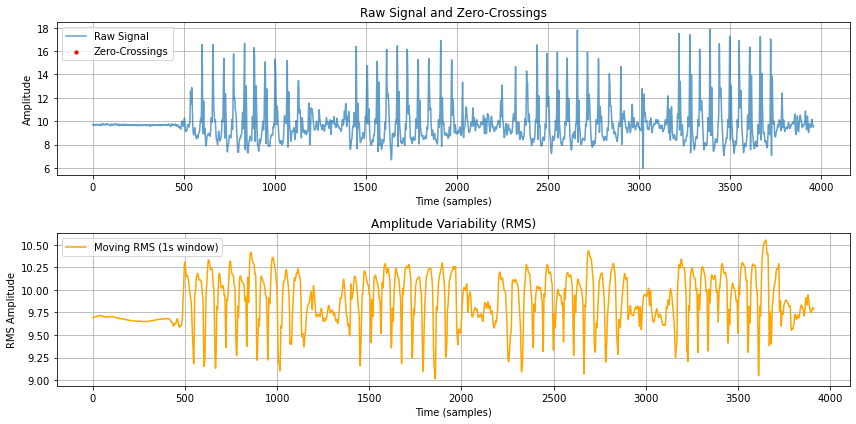

38635.232757

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

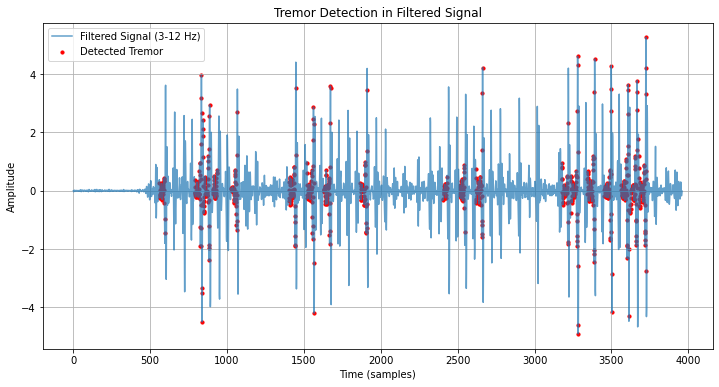

(830, 20.954304468568544)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

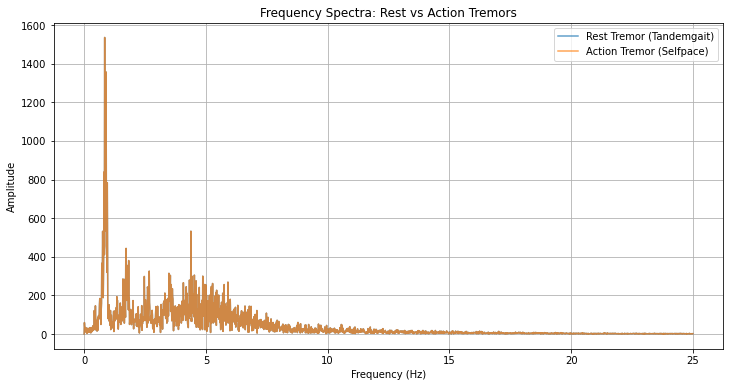

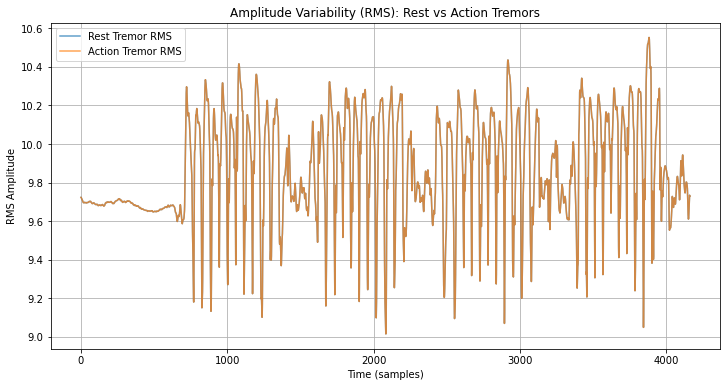

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


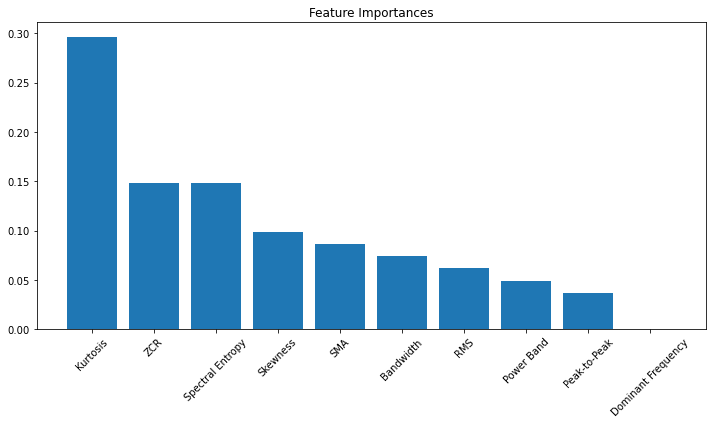

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.2962962962962963),
  ('Spectral Entropy', 0.14814814814814814),
  ('ZCR', 0.14814814814814814),
  ('Skewness', 0.09876543209876543),
  ('SMA', 0.08641975308641975),
  ('Bandwidth', 0.07407407407407407),
  ('RMS', 0.06172839506172839),
  ('Power Band', 0.04938271604938271),
  ('Peak-to-Peak', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS121_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

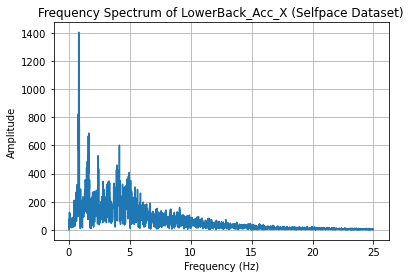

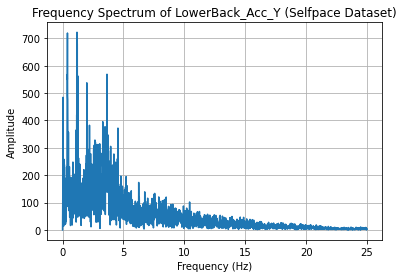

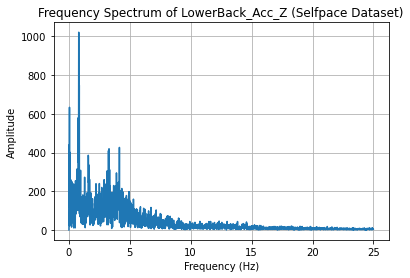

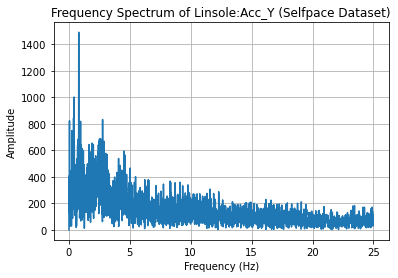

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

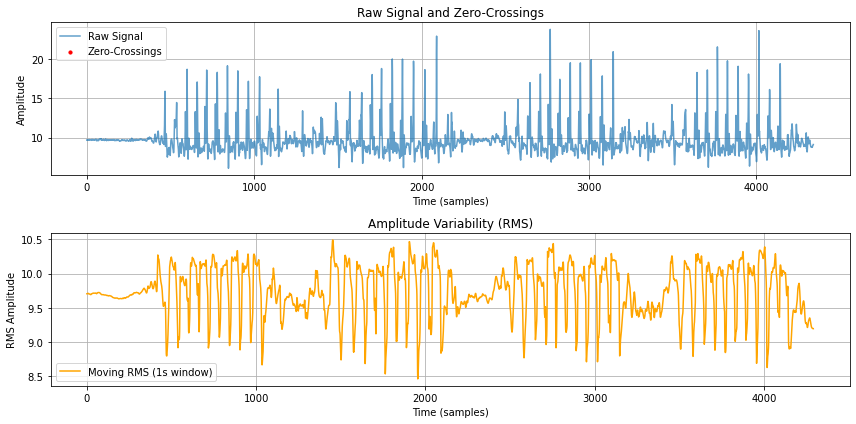

41663.894141

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

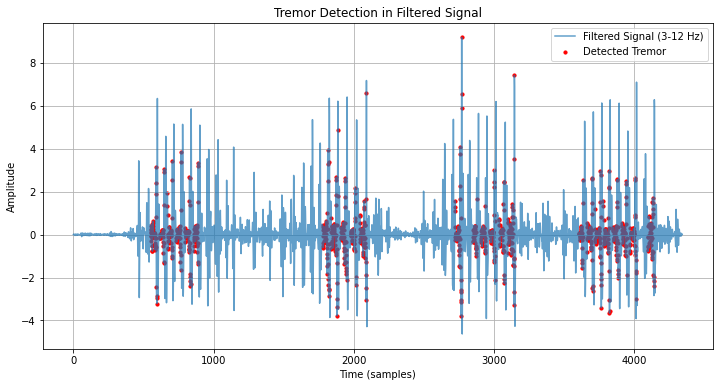

(1017, 23.422385997236297)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

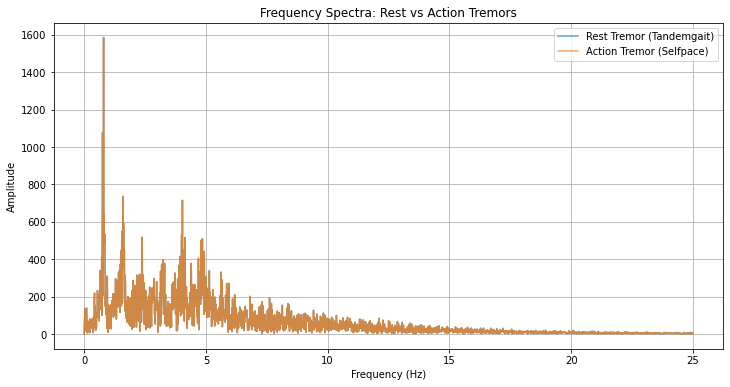

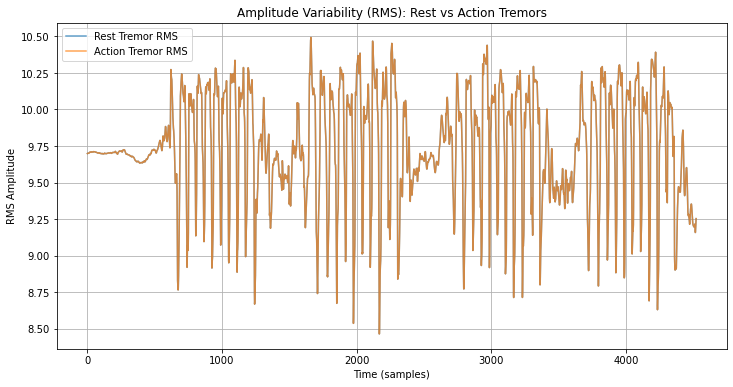

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


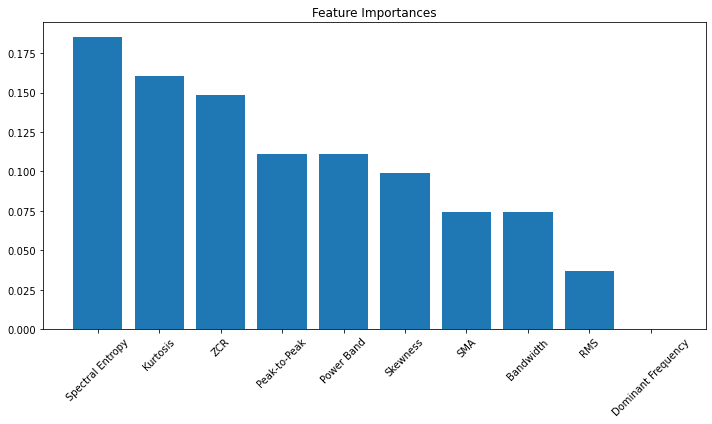

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Spectral Entropy', 0.18518518518518517),
  ('Kurtosis', 0.16049382716049385),
  ('ZCR', 0.14814814814814814),
  ('Power Band', 0.1111111111111111),
  ('Peak-to-Peak', 0.1111111111111111),
  ('Skewness', 0.09876543209876543),
  ('Bandwidth', 0.07407407407407407),
  ('SMA', 0.07407407407407407),
  ('RMS', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS127_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

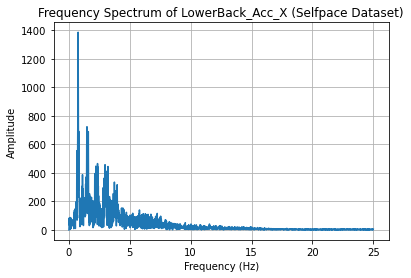

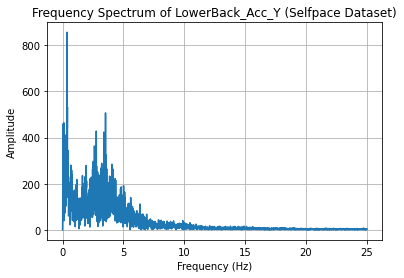

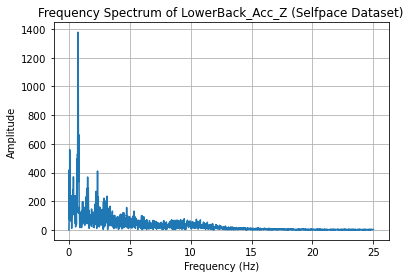

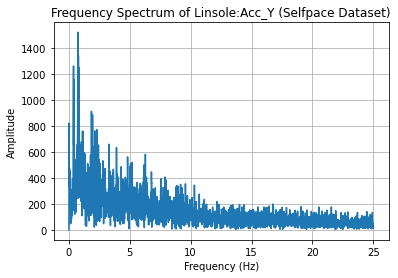

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

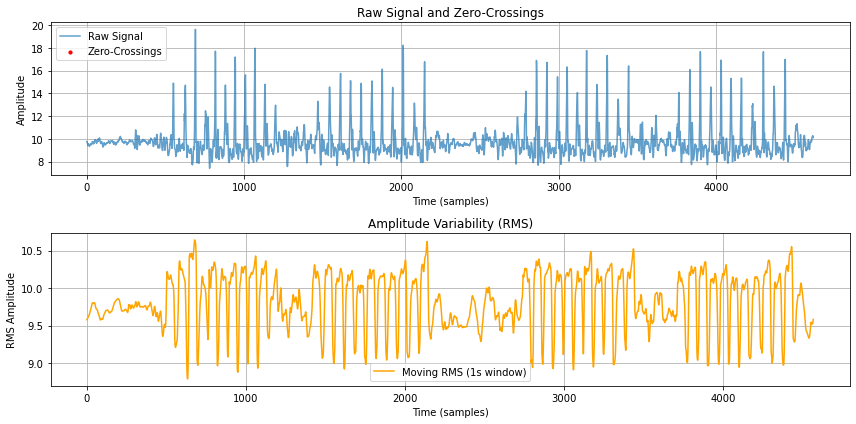

44906.47425500001

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

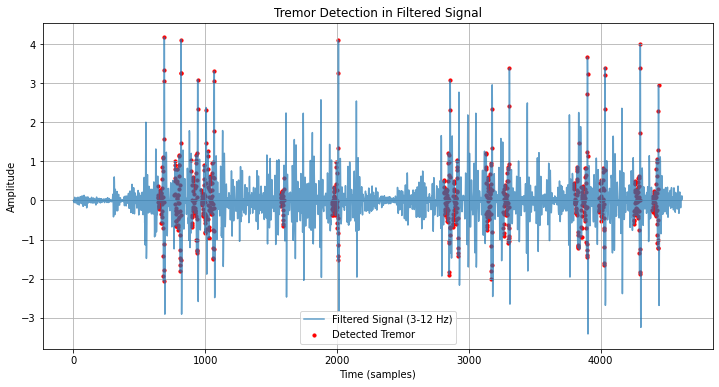

(737, 15.95583459623295)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

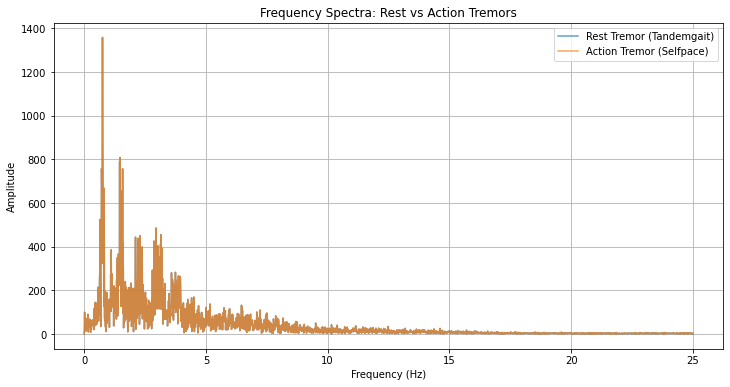

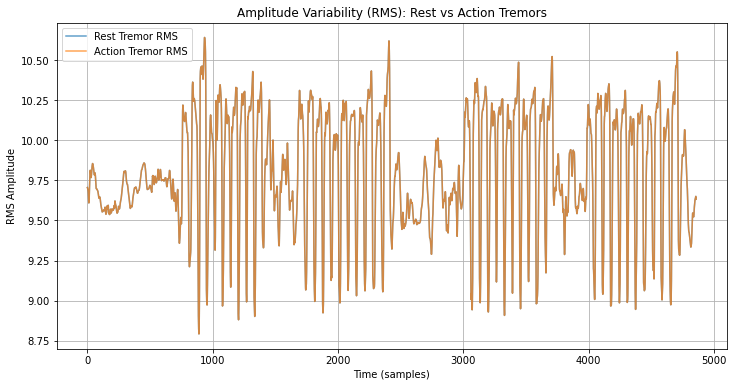

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


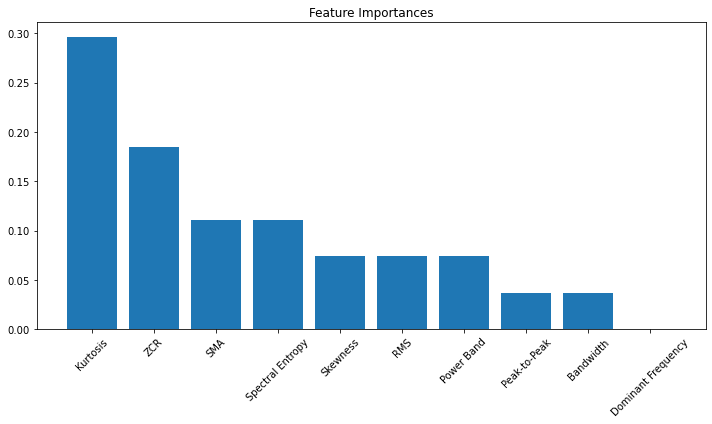

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('ZCR', 0.1851851851851852),
  ('Spectral Entropy', 0.11111111111111112),
  ('SMA', 0.11111111111111112),
  ('Power Band', 0.07407407407407408),
  ('RMS', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('Bandwidth', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS130_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

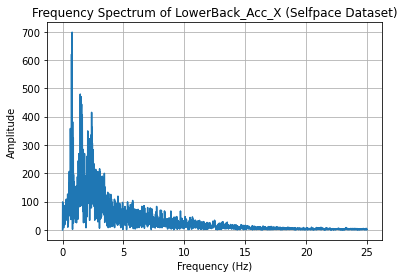

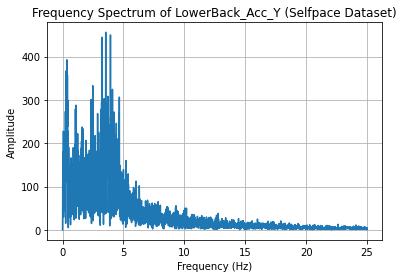

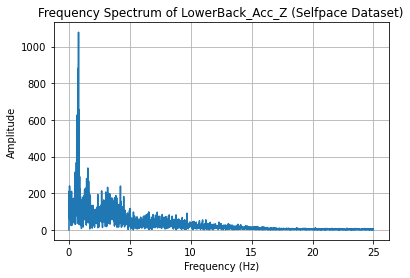

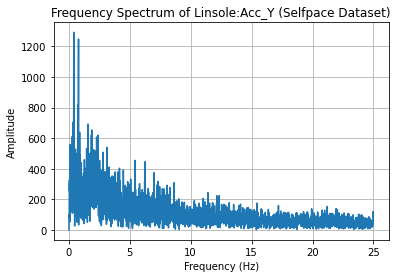

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

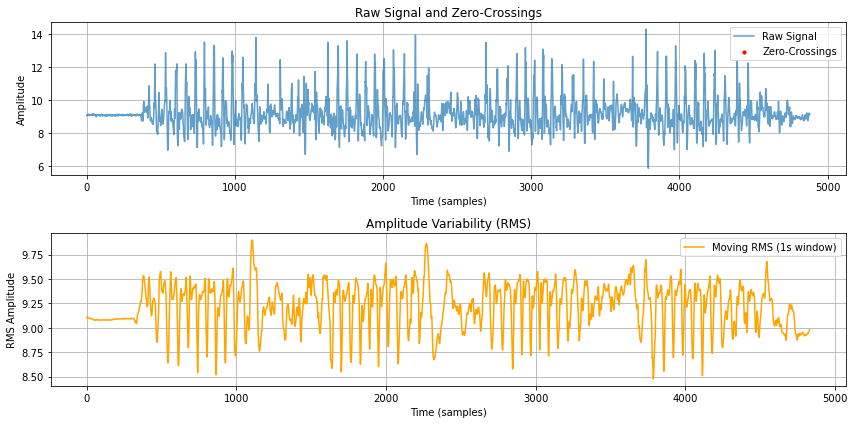

44771.219906

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

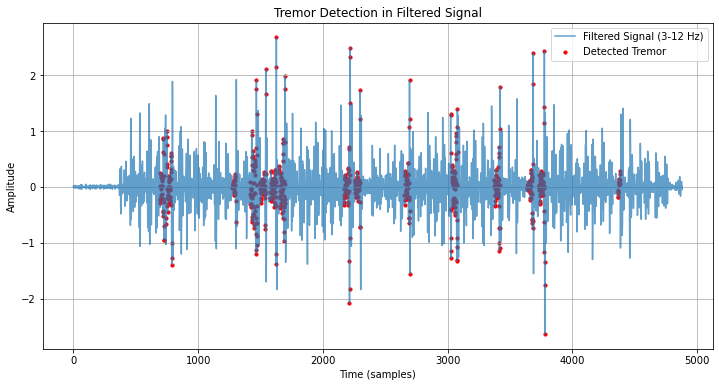

(674, 13.811475409836065)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

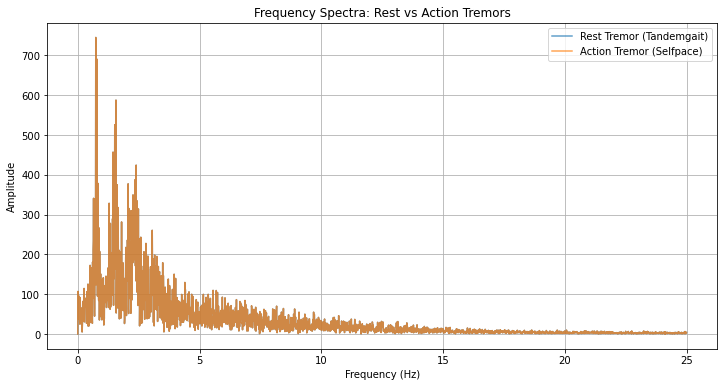

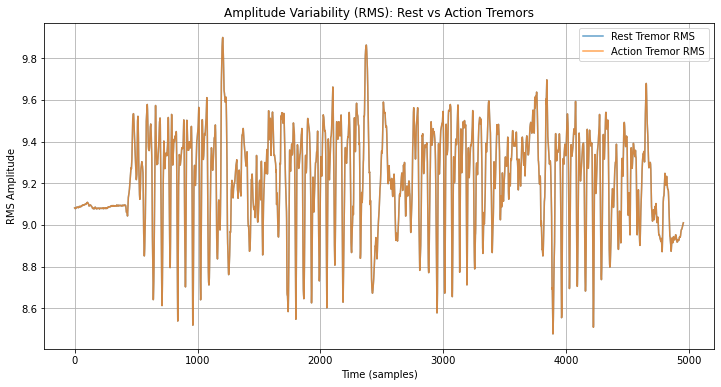

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


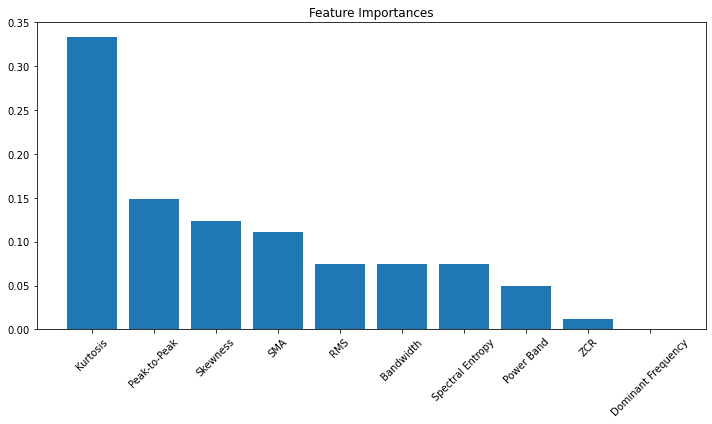

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.3333333333333333),
  ('Peak-to-Peak', 0.14814814814814814),
  ('Skewness', 0.12345679012345678),
  ('SMA', 0.11111111111111109),
  ('Spectral Entropy', 0.07407407407407407),
  ('Bandwidth', 0.07407407407407407),
  ('RMS', 0.07407407407407407),
  ('Power Band', 0.04938271604938271),
  ('ZCR', 0.012345679012345685),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS135_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

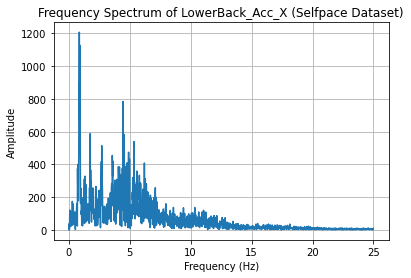

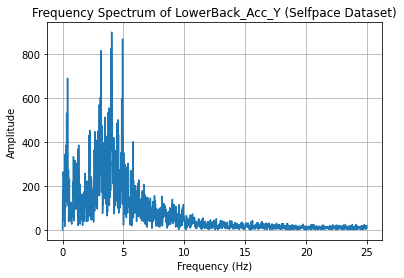

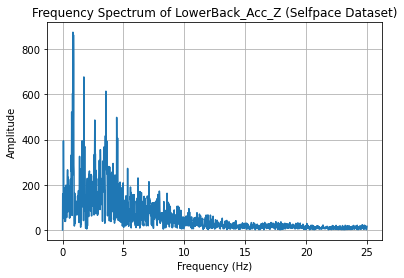

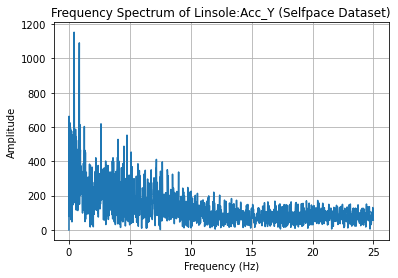

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

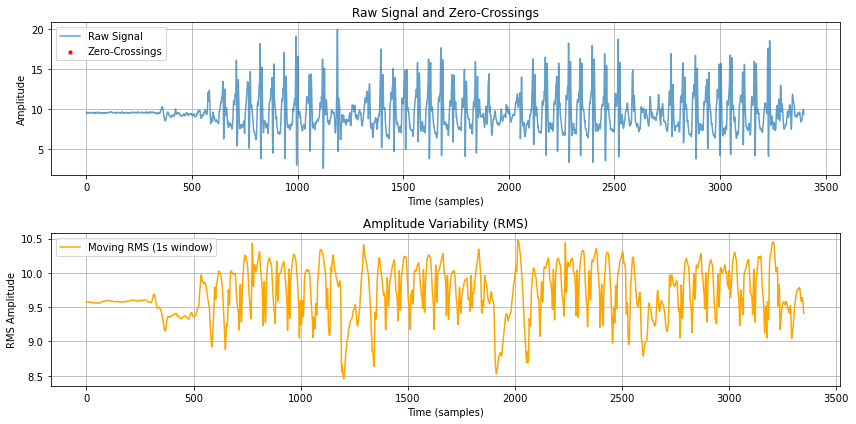

32213.961236

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

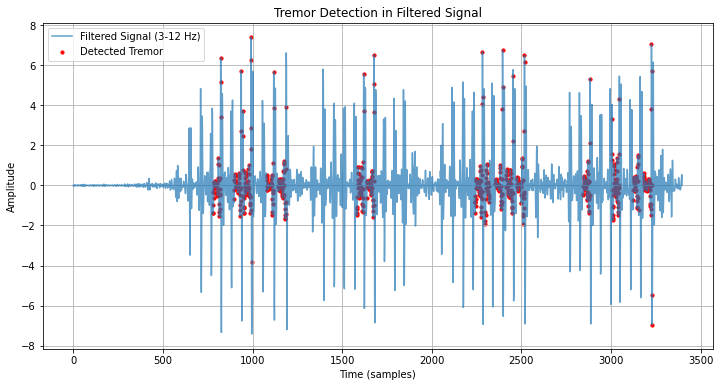

(663, 19.511477339611535)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

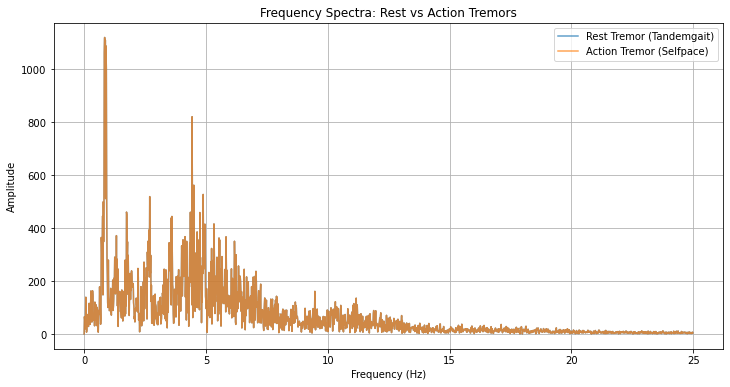

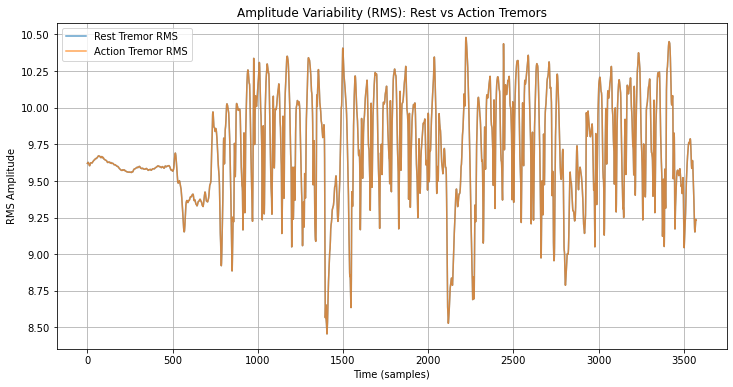

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


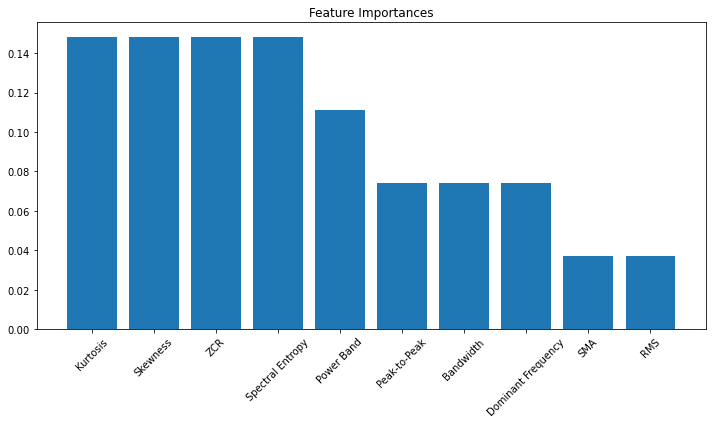

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Spectral Entropy', 0.14814814814814814),
  ('ZCR', 0.14814814814814814),
  ('Skewness', 0.14814814814814814),
  ('Kurtosis', 0.14814814814814814),
  ('Power Band', 0.1111111111111111),
  ('Dominant Frequency', 0.07407407407407407),
  ('Bandwidth', 0.07407407407407407),
  ('Peak-to-Peak', 0.07407407407407407),
  ('RMS', 0.037037037037037035),
  ('SMA', 0.037037037037037035)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS141_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

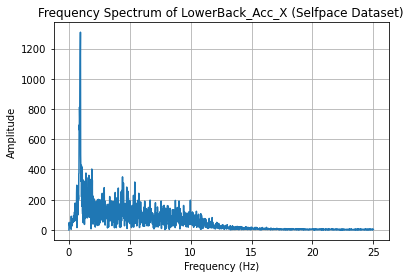

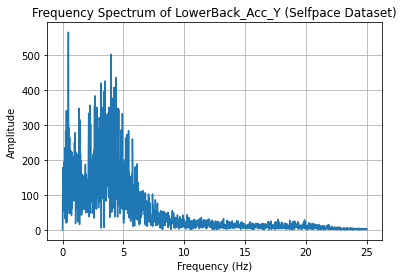

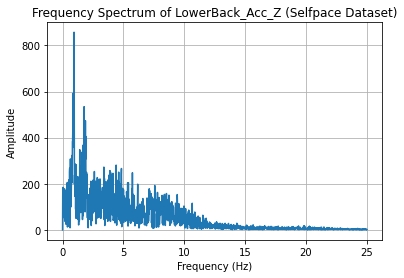

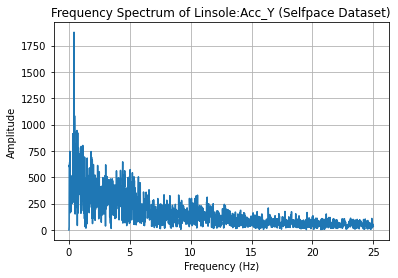

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

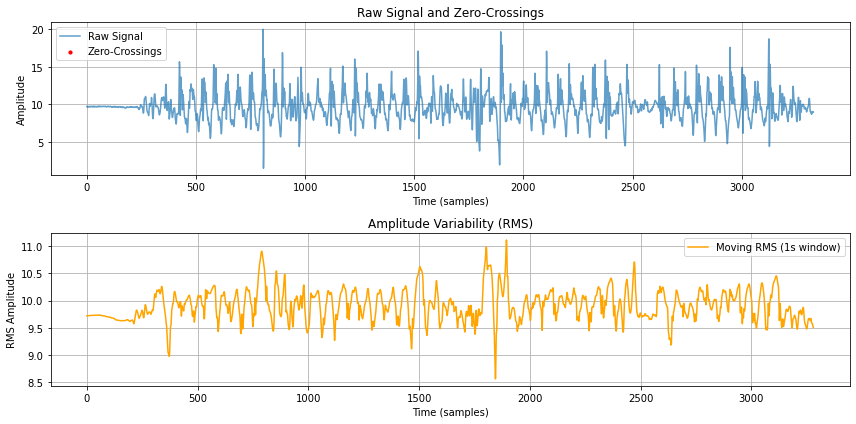

32422.736278999997

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

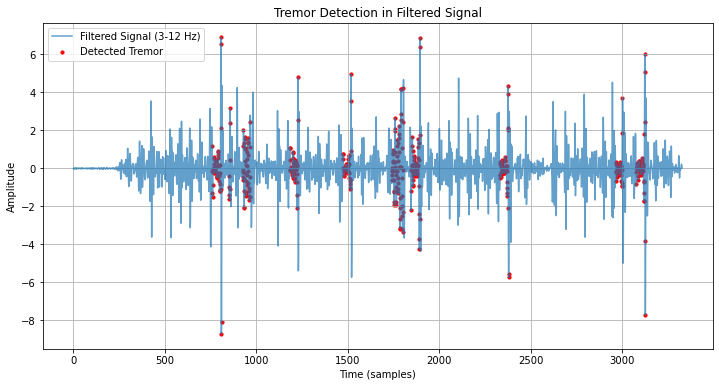

(449, 13.48753379393211)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

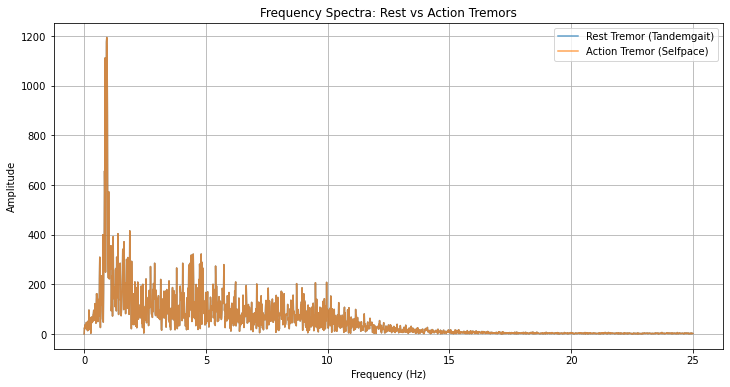

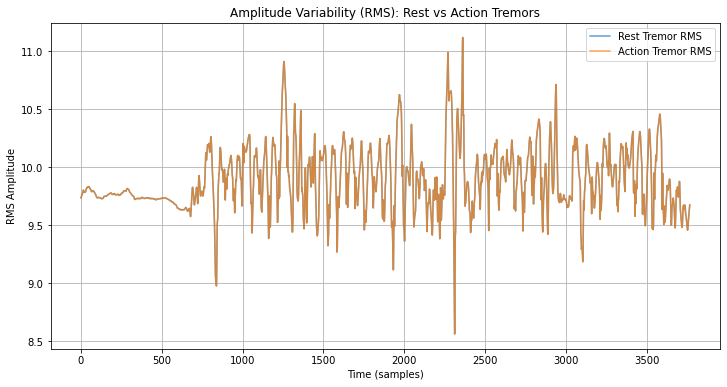

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


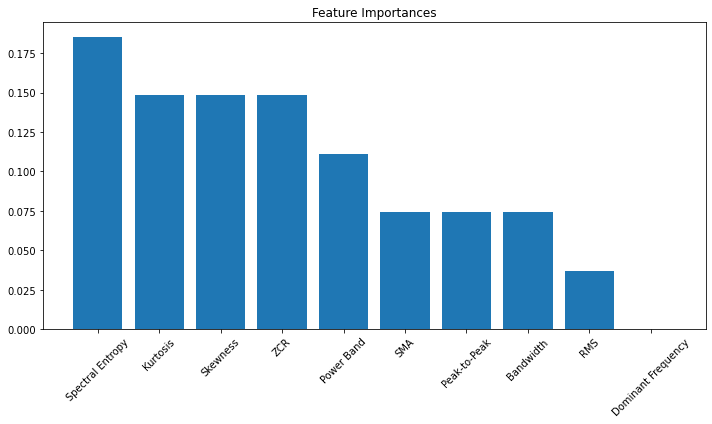

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Spectral Entropy', 0.18518518518518517),
  ('ZCR', 0.14814814814814814),
  ('Skewness', 0.14814814814814814),
  ('Kurtosis', 0.14814814814814814),
  ('Power Band', 0.1111111111111111),
  ('Bandwidth', 0.07407407407407407),
  ('Peak-to-Peak', 0.07407407407407407),
  ('SMA', 0.07407407407407407),
  ('RMS', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS142_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'selfpace':            Time GeneralEvent ClinicalEvent  L Foot Contact  R Foot Contact  \
0         0 sec     Standing     unlabeled               1               0   
1      0.01 sec     Standing     unlabeled               1               0   
2      0.02 sec     Standing     unlabeled               1               0   
3      0.03 sec     Standing     unlabeled               1               0   
4      0.04 sec     Standing     unlabeled               1               0   
...         ...          ...           ...             ...             ...   
4342  43.42 sec    unlabeled     unlabeled               0               0   
4343  43.43 sec    unlabeled     unlabeled               0               0   
4344  43.44 sec    unlabeled     unlabeled               0               0   
4345  43.45 sec    unlabeled     unlabeled               0               0   
4346  43.46 sec    unlabeled     unlabeled               0               0   

      L Foot Pressure  R Foot Pressure  \
0       

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

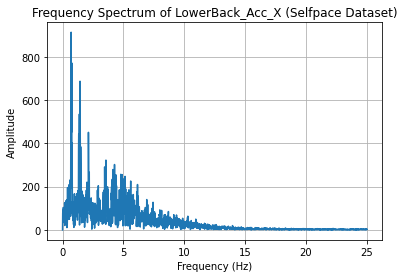

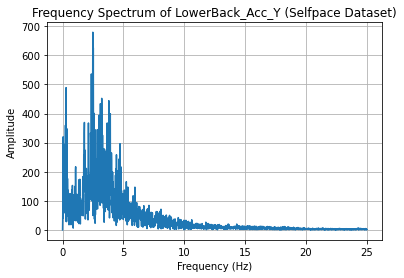

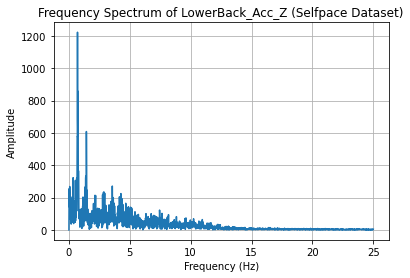

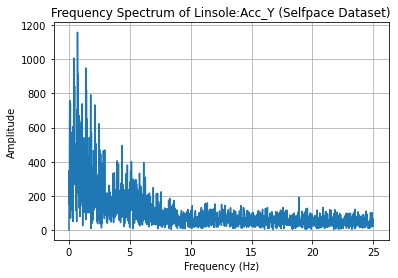

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

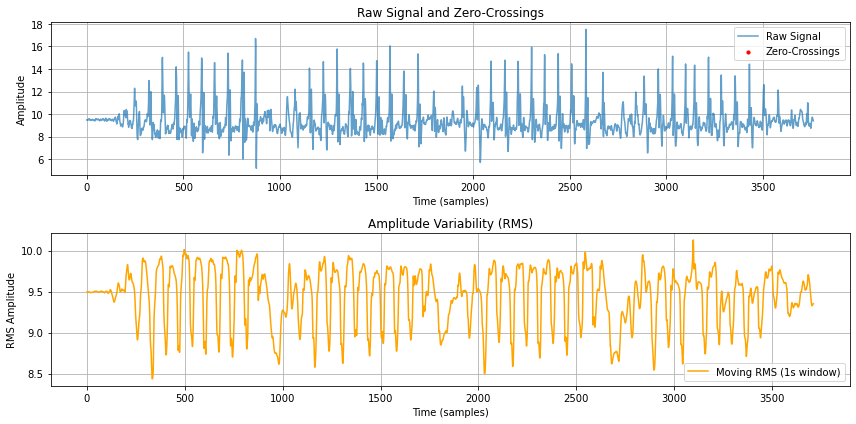

35245.590622

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

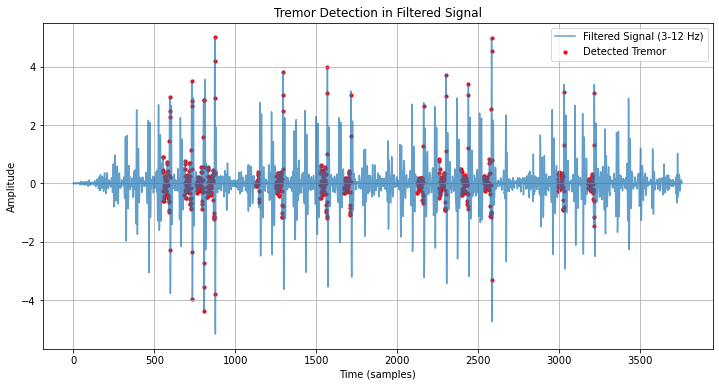

(618, 16.431800053177348)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

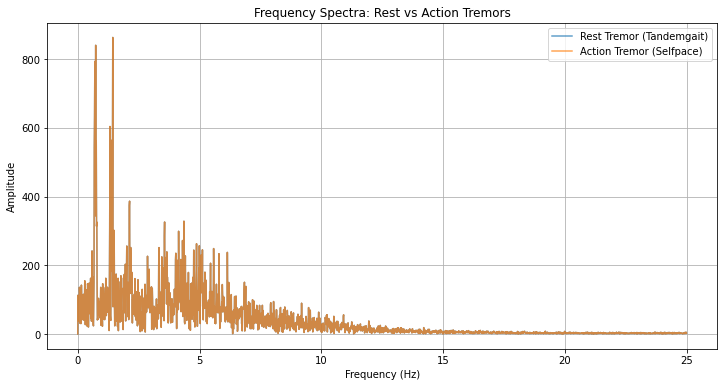

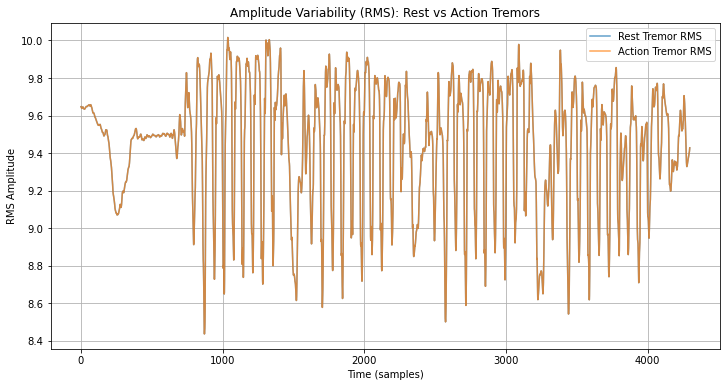

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


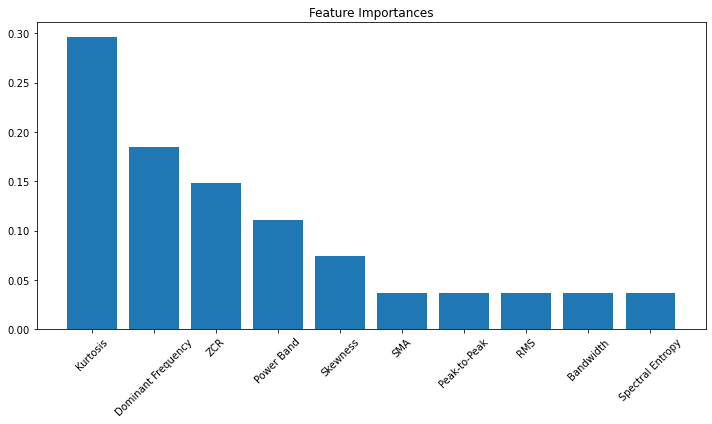

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Dominant Frequency', 0.1851851851851852),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Skewness', 0.07407407407407408),
  ('Spectral Entropy', 0.03703703703703704),
  ('Bandwidth', 0.03703703703703704),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('SMA', 0.03703703703703704)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS143_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

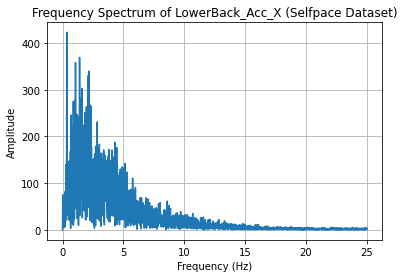

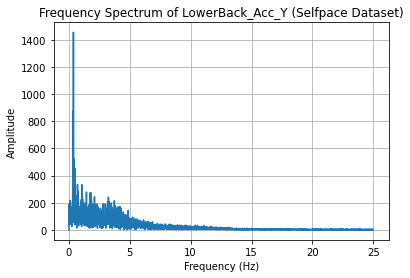

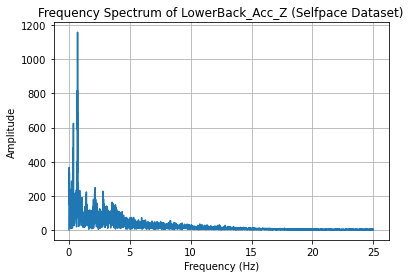

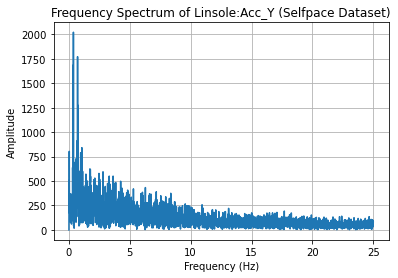

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

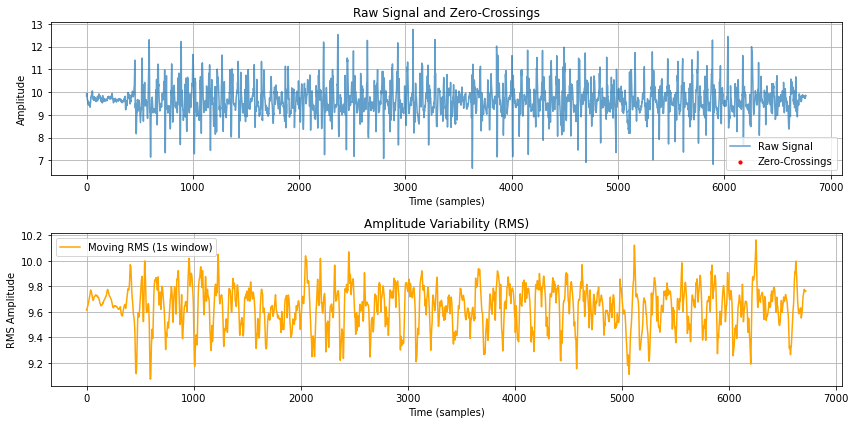

65125.485032000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

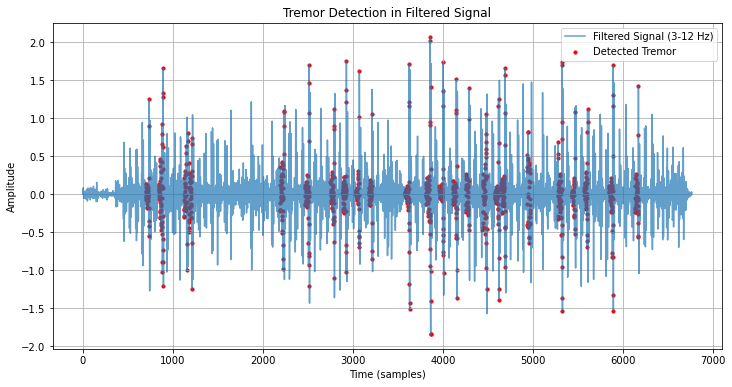

(1075, 15.88356973995272)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

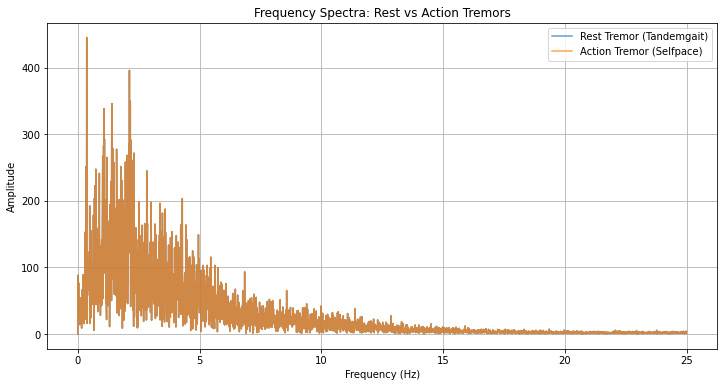

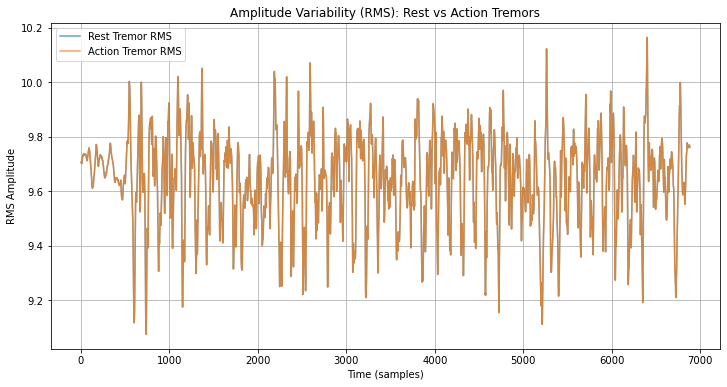

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


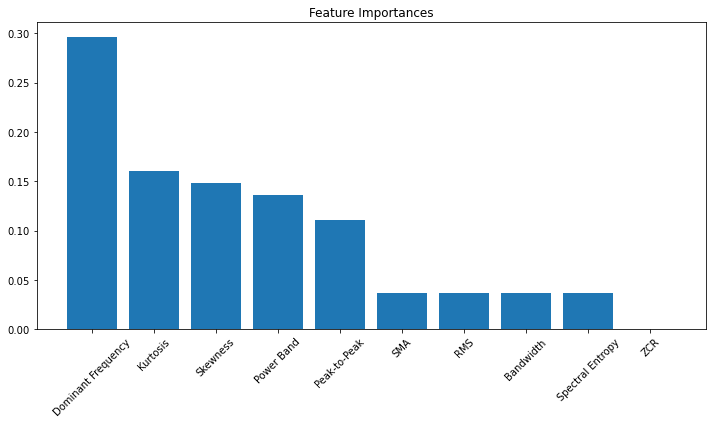

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Dominant Frequency', 0.2962962962962963),
  ('Kurtosis', 0.16049382716049385),
  ('Skewness', 0.14814814814814814),
  ('Power Band', 0.13580246913580246),
  ('Peak-to-Peak', 0.1111111111111111),
  ('Spectral Entropy', 0.037037037037037035),
  ('Bandwidth', 0.037037037037037035),
  ('RMS', 0.037037037037037035),
  ('SMA', 0.037037037037037035),
  ('ZCR', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS144_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
73       Forehead_Acc_Y       Forehead_Acc_Y
74       Forehead_Acc_Z       Forehead_Acc_Z
75   Forehead_FreeAcc_E   Forehead_FreeAcc_E
76   Forehead_FreeAcc_N   Forehead_FreeAcc_N
77   Forehead_FreeAcc_U   Forehead_FreeAcc_U

[78 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

KeyError: "['Linsole:Acc_Y'] not in index"

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

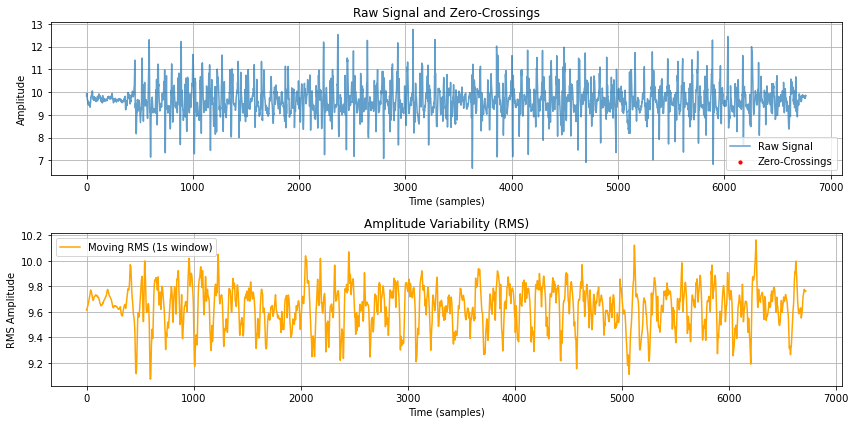

65125.485032000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

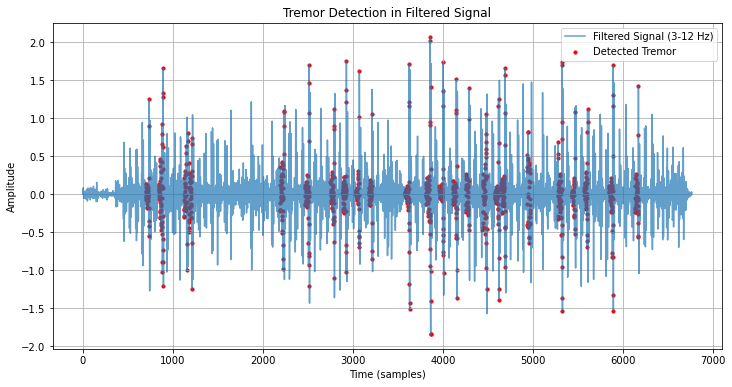

(1075, 15.88356973995272)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

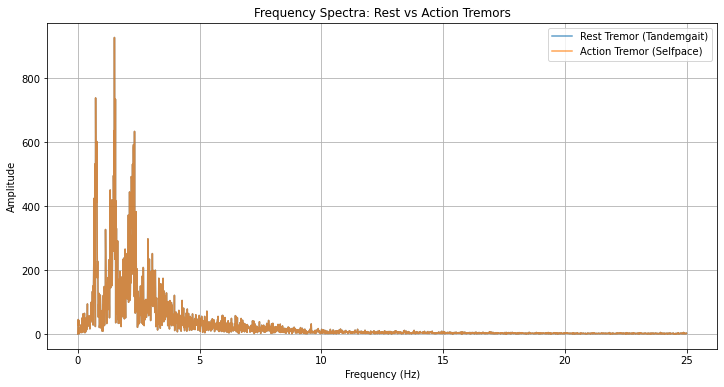

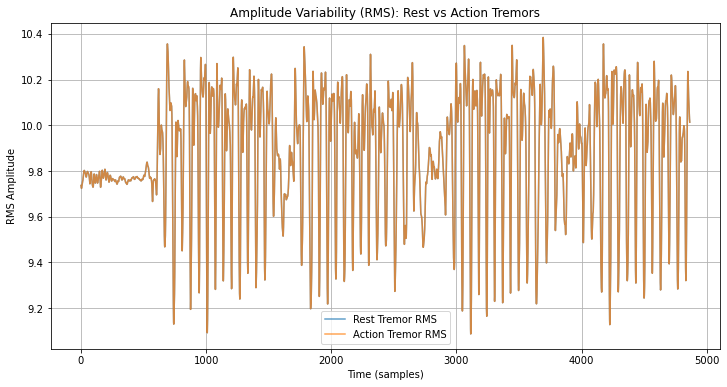

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


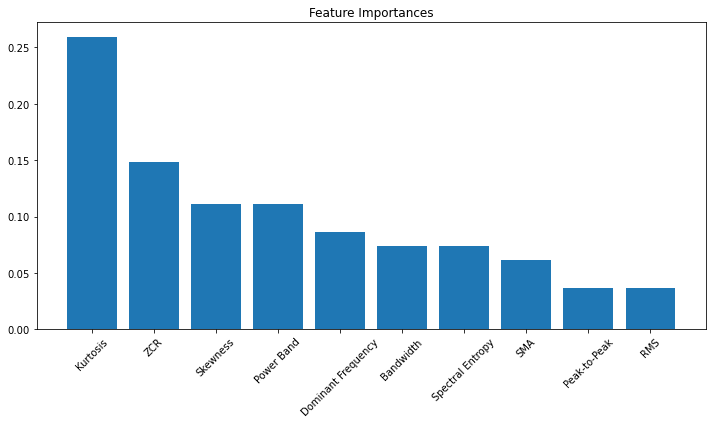

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.25925925925925924),
  ('ZCR', 0.14814814814814814),
  ('Power Band', 0.1111111111111111),
  ('Skewness', 0.1111111111111111),
  ('Dominant Frequency', 0.08641975308641976),
  ('Spectral Entropy', 0.07407407407407407),
  ('Bandwidth', 0.07407407407407407),
  ('SMA', 0.06172839506172839),
  ('RMS', 0.037037037037037035),
  ('Peak-to-Peak', 0.037037037037037035)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS146_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'selfpace':            Time GeneralEvent ClinicalEvent  L Foot Contact  R Foot Contact  \
0         0 sec     Standing     unlabeled               0               0   
1      0.01 sec     Standing     unlabeled               0               0   
2      0.02 sec     Standing     unlabeled               0               0   
3      0.03 sec     Standing     unlabeled               0               0   
4      0.04 sec     Standing     unlabeled               0               0   
...         ...          ...           ...             ...             ...   
6485  64.85 sec         Turn     unlabeled               0               0   
6486  64.86 sec         Turn     unlabeled               0               0   
6487  64.87 sec         Turn     unlabeled               0               0   
6488  64.88 sec         Turn     unlabeled               0               0   
6489  64.89 sec         Turn     unlabeled               0               0   

      L Foot Pressure  R Foot Pressure Walkway_X W

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

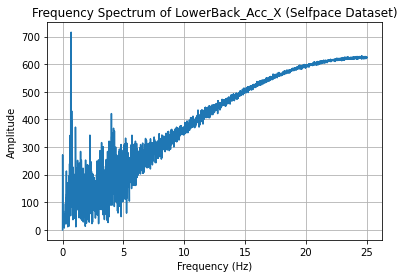

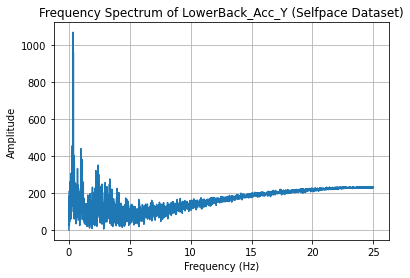

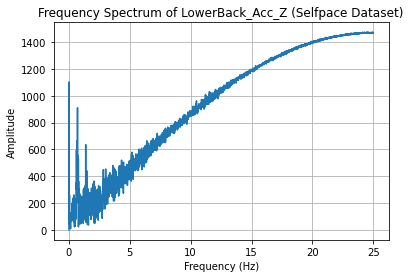

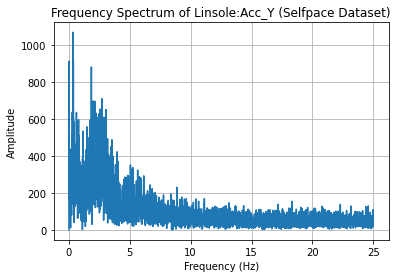

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

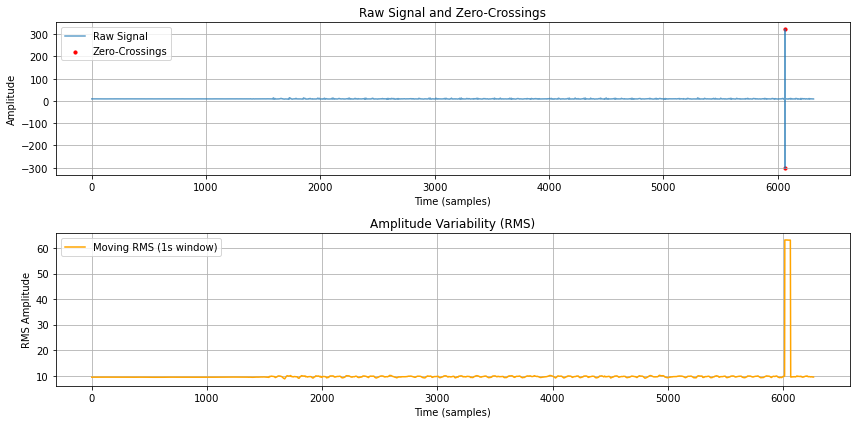

60911.136167000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

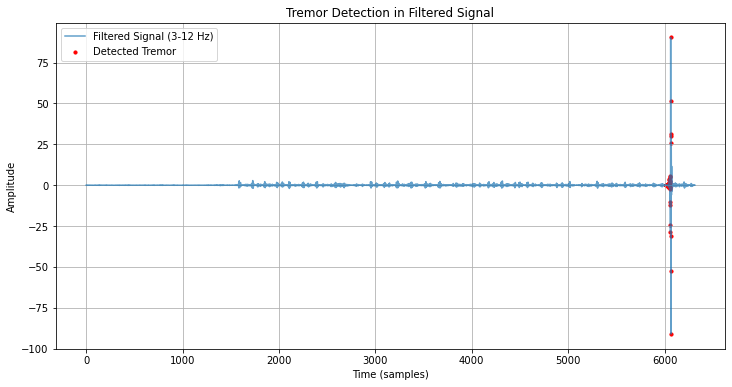

(60, 0.9501187648456058)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

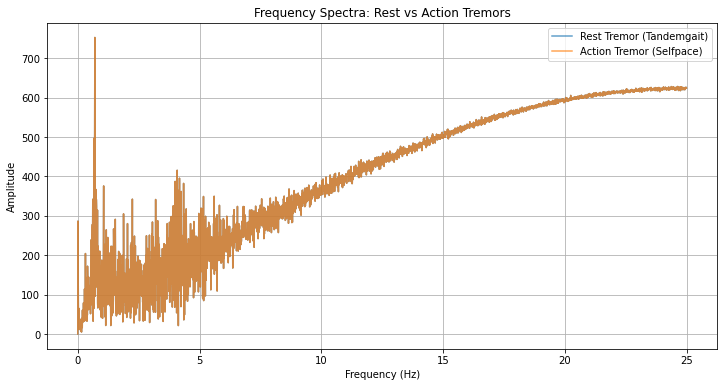

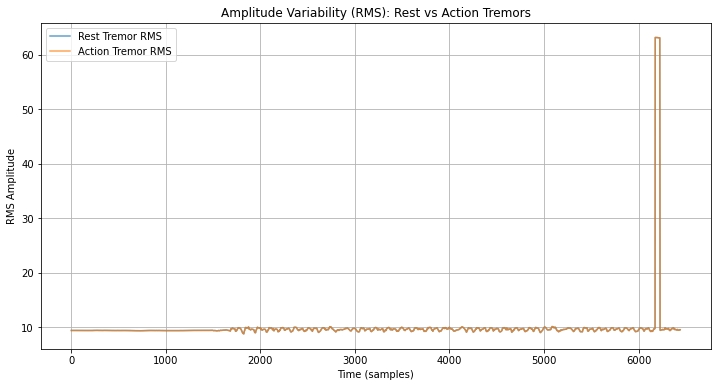

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


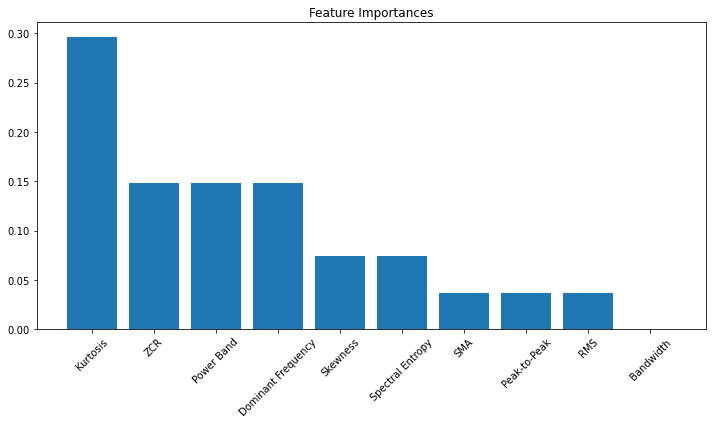

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Dominant Frequency', 0.14814814814814817),
  ('Power Band', 0.14814814814814817),
  ('ZCR', 0.14814814814814817),
  ('Spectral Entropy', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('SMA', 0.03703703703703704),
  ('Bandwidth', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS147_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
73       Forehead_Acc_Y       Forehead_Acc_Y
74       Forehead_Acc_Z       Forehead_Acc_Z
75   Forehead_FreeAcc_E   Forehead_FreeAcc_E
76   Forehead_FreeAcc_N   Forehead_FreeAcc_N
77   Forehead_FreeAcc_U   Forehead_FreeAcc_U

[78 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

KeyError: "['Linsole:Acc_Y'] not in index"

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

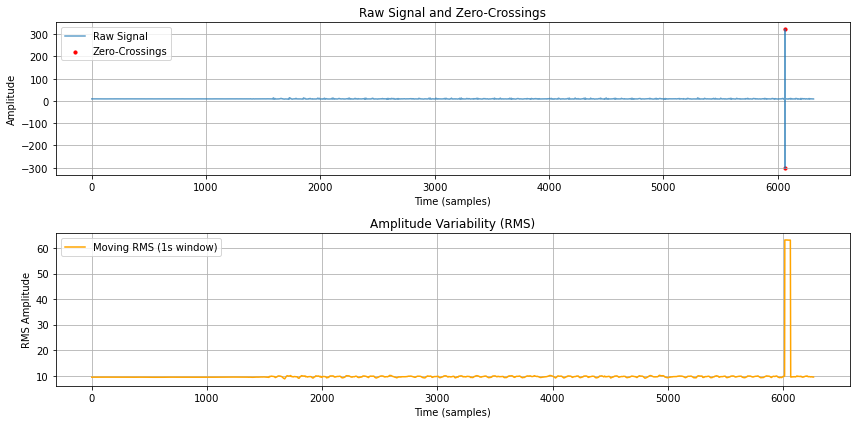

60911.136167000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

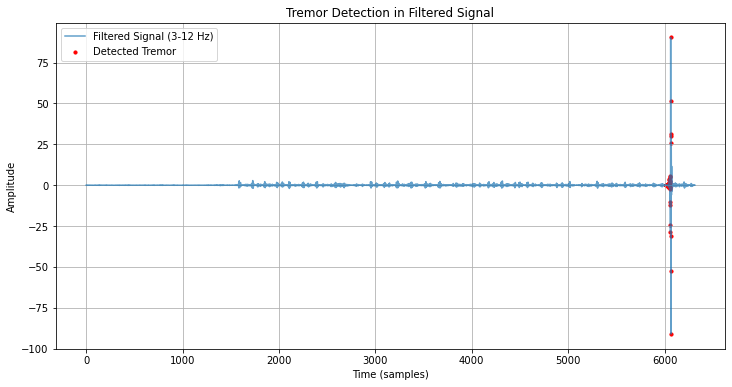

(60, 0.9501187648456058)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

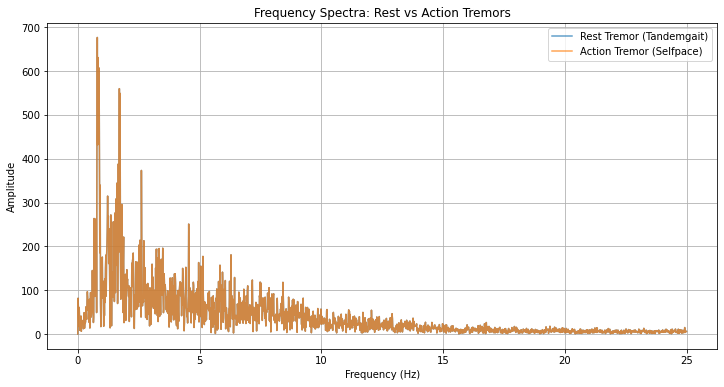

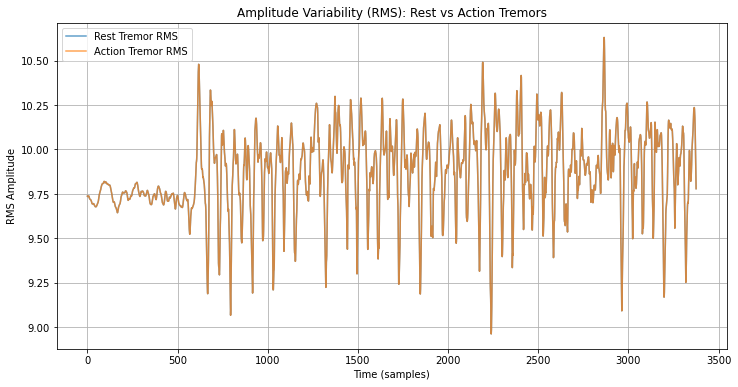

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


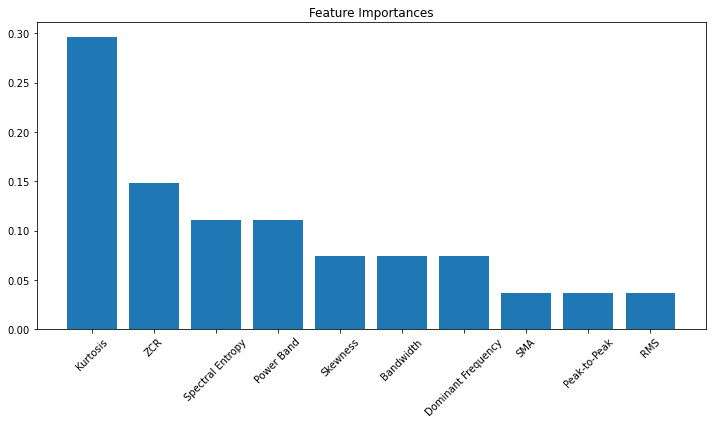

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Spectral Entropy', 0.11111111111111112),
  ('Dominant Frequency', 0.07407407407407408),
  ('Bandwidth', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('SMA', 0.03703703703703704)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS148_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

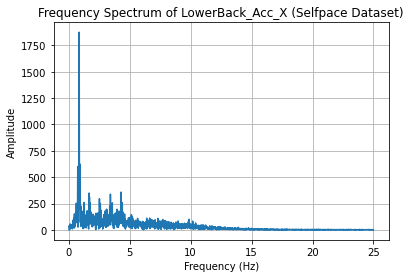

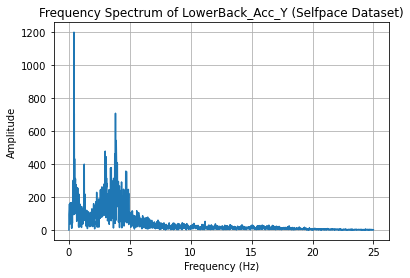

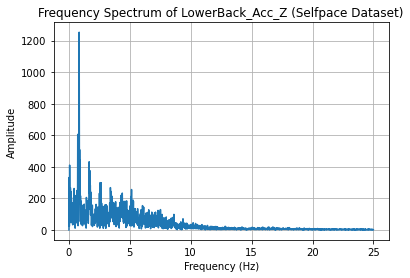

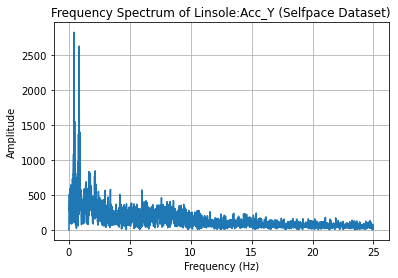

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

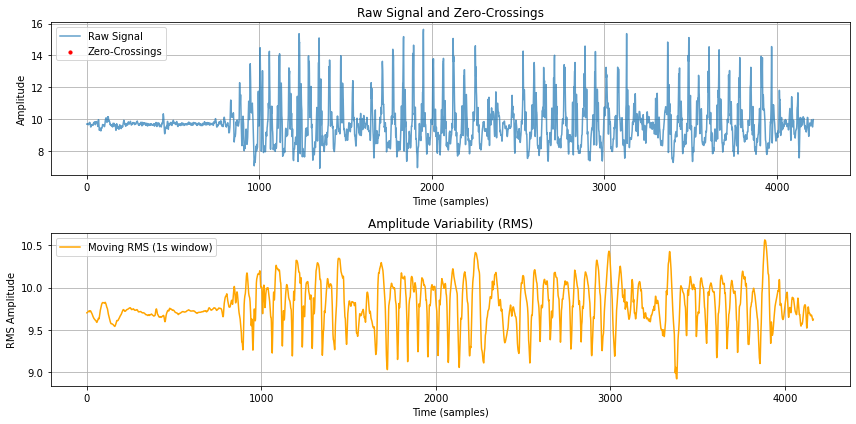

40930.402013

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

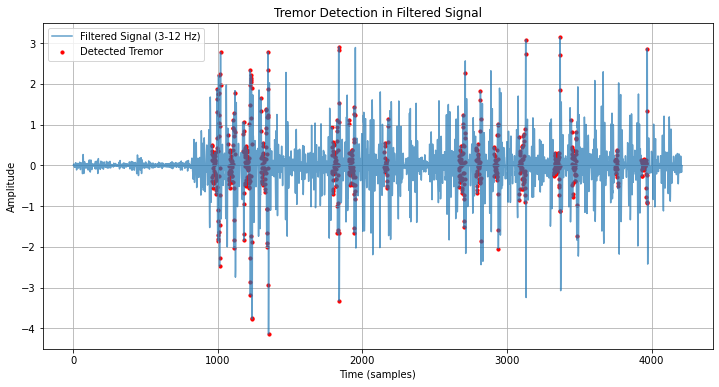

(655, 15.550807217473883)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

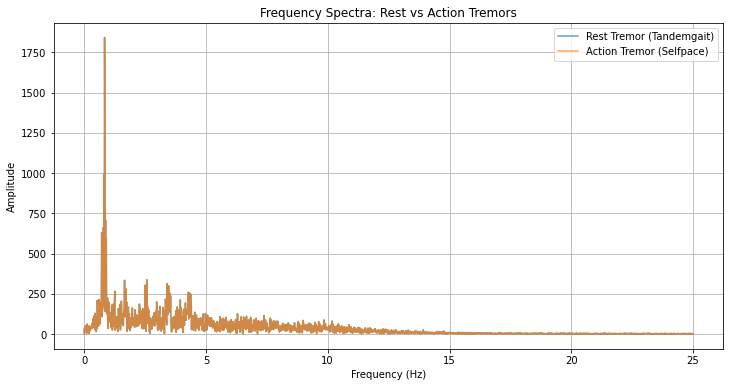

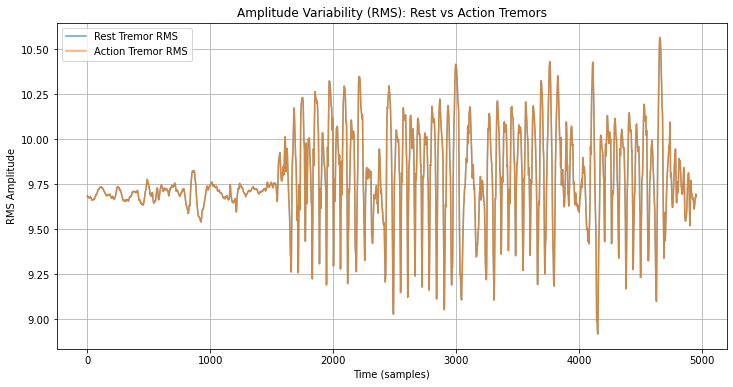

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_cla

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


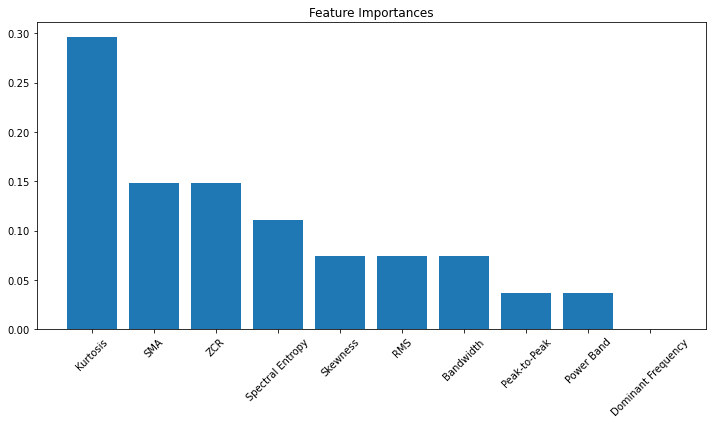

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('ZCR', 0.14814814814814817),
  ('SMA', 0.14814814814814817),
  ('Spectral Entropy', 0.11111111111111112),
  ('Bandwidth', 0.07407407407407408),
  ('RMS', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('Power Band', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS149_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{'selfpace':            Time GeneralEvent ClinicalEvent  L Foot Contact  R Foot Contact  \
0         0 sec     Standing     unlabeled               0               0   
1      0.01 sec     Standing     unlabeled               0               0   
2      0.02 sec     Standing     unlabeled               0               0   
3      0.03 sec     Standing     unlabeled               0               0   
4      0.04 sec     Standing     unlabeled               0               0   
...         ...          ...           ...             ...             ...   
4120   41.2 sec    unlabeled     unlabeled               0               0   
4121  41.21 sec    unlabeled     unlabeled               0               0   
4122  41.22 sec    unlabeled     unlabeled               0               0   
4123  41.23 sec    unlabeled     unlabeled               0               0   
4124  41.24 sec    unlabeled     unlabeled               0               0   

      L Foot Pressure  R Foot Pressure Walkway_X W

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

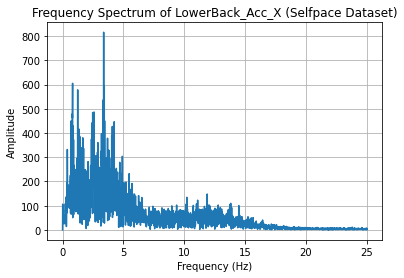

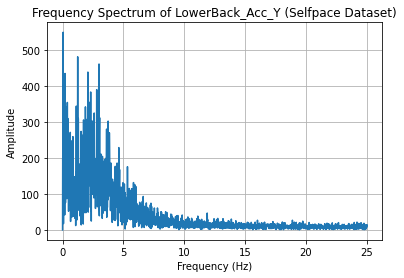

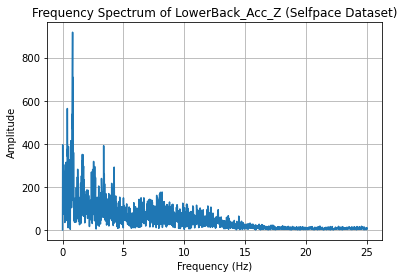

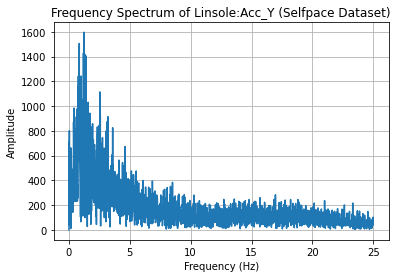

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

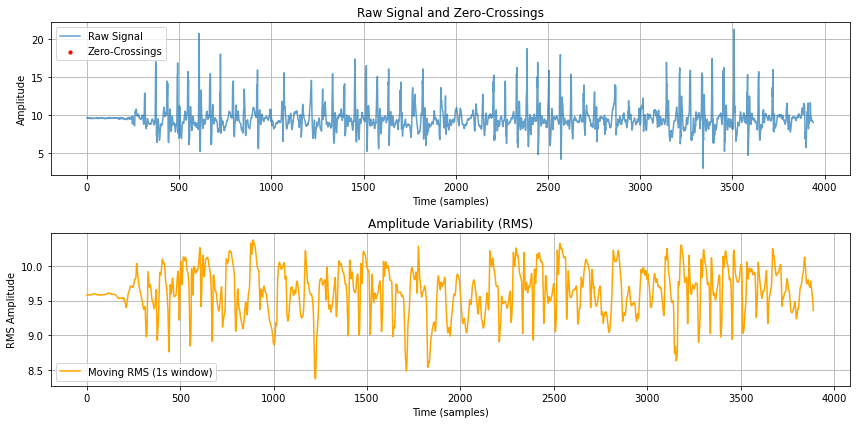

37488.155617000004

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

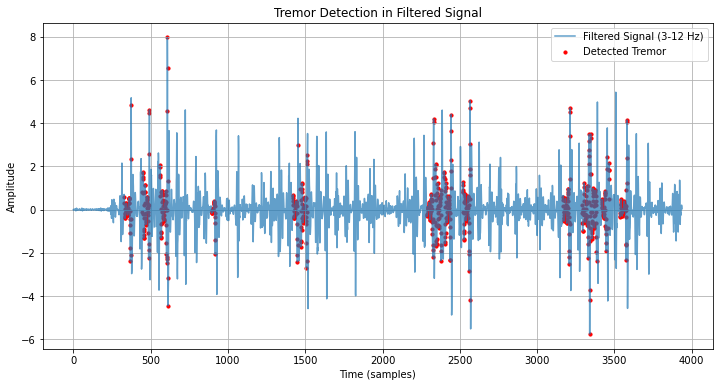

(664, 16.857070322416856)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

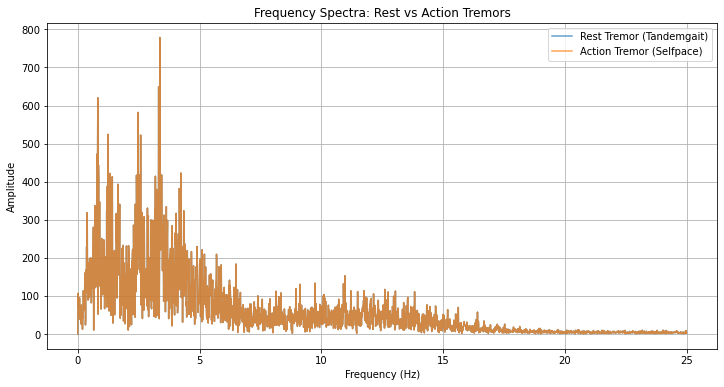

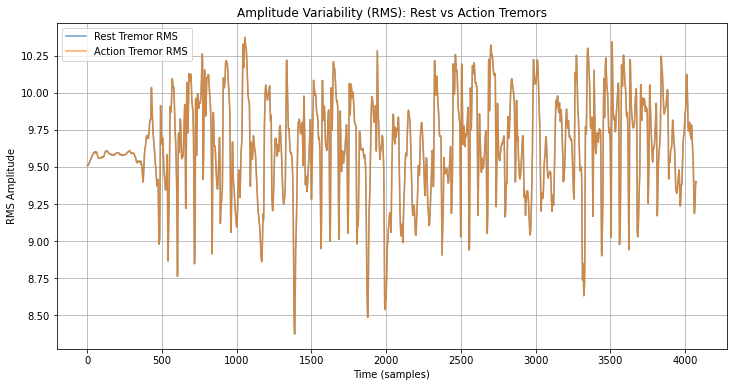

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


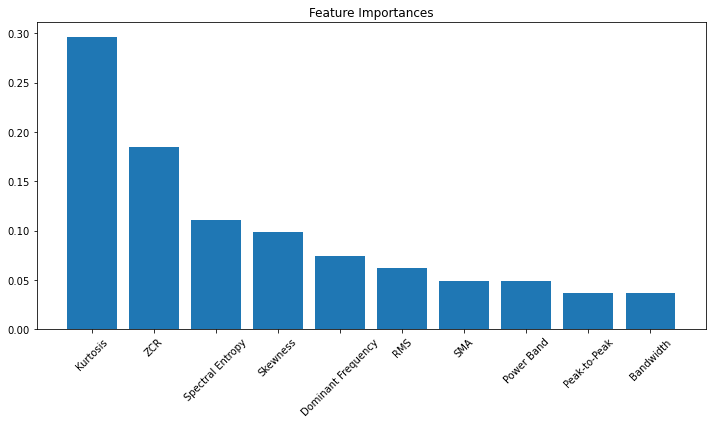

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.2962962962962963),
  ('ZCR', 0.18518518518518517),
  ('Spectral Entropy', 0.1111111111111111),
  ('Skewness', 0.09876543209876543),
  ('Dominant Frequency', 0.07407407407407407),
  ('RMS', 0.06172839506172839),
  ('Power Band', 0.04938271604938271),
  ('SMA', 0.04938271604938271),
  ('Bandwidth', 0.037037037037037035),
  ('Peak-to-Peak', 0.037037037037037035)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS150_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

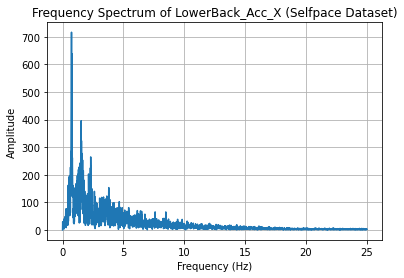

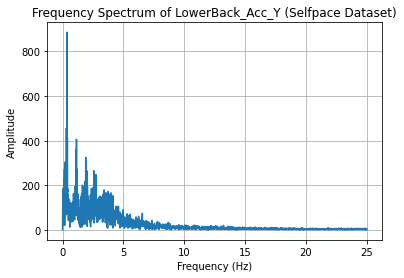

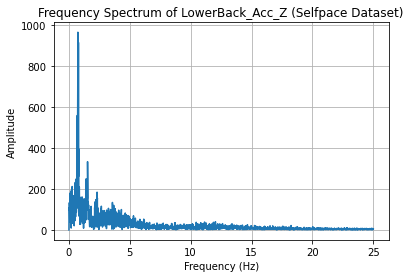

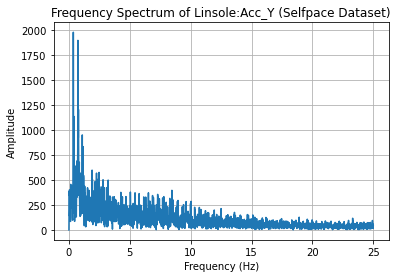

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

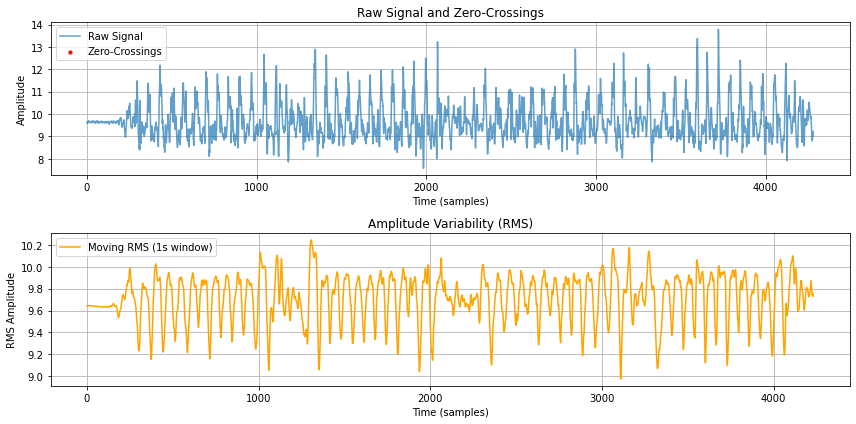

41447.582573

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

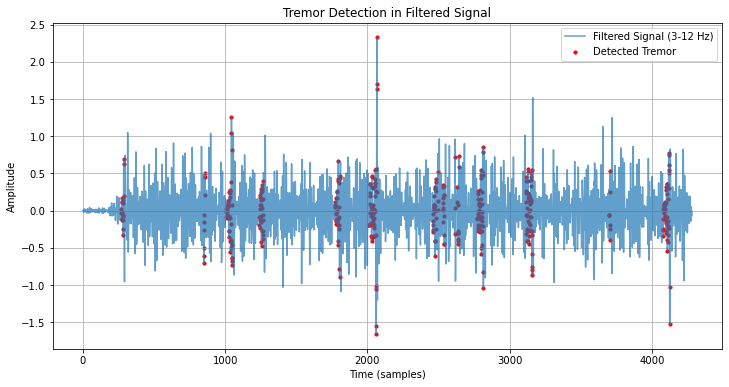

(398, 9.296893249240831)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

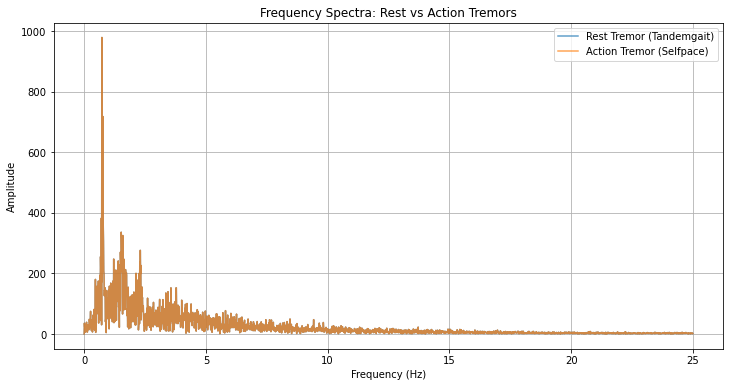

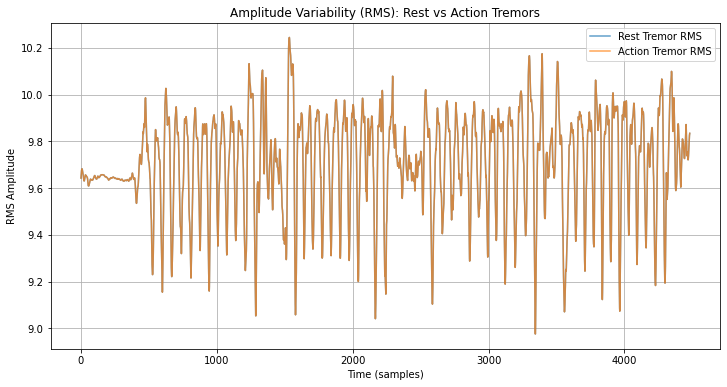

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


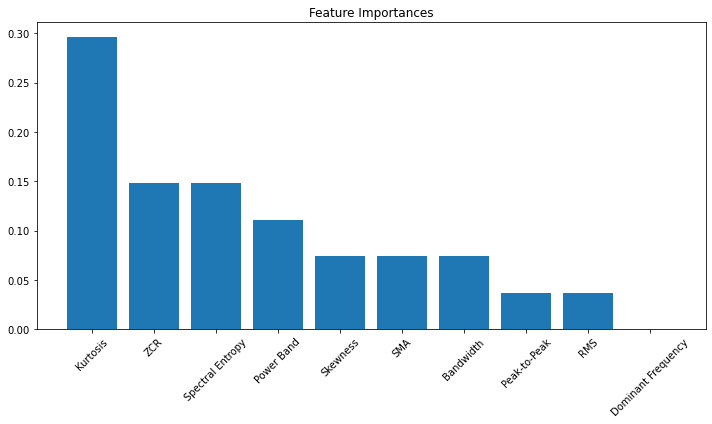

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Spectral Entropy', 0.14814814814814817),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Bandwidth', 0.07407407407407408),
  ('SMA', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS151_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

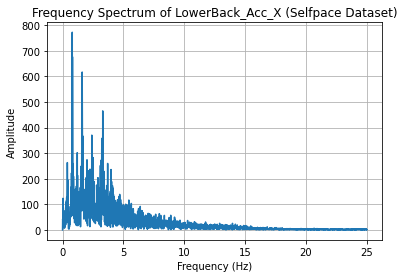

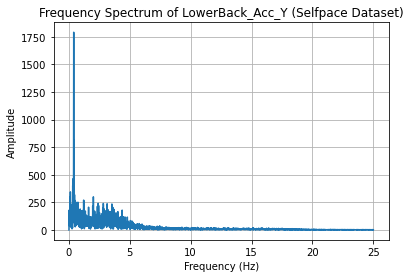

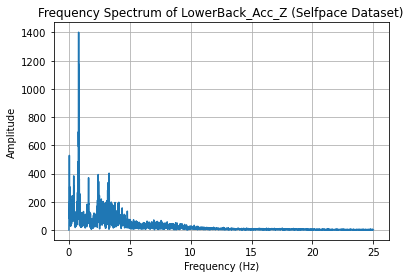

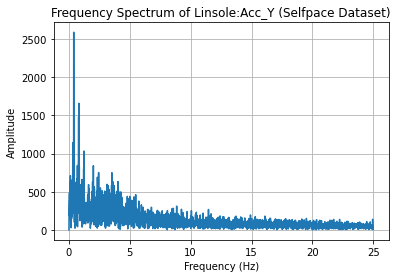

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

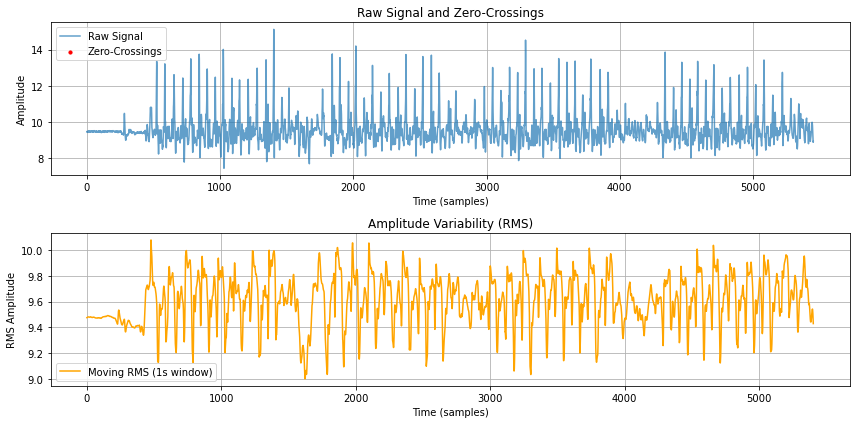

52238.311338

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

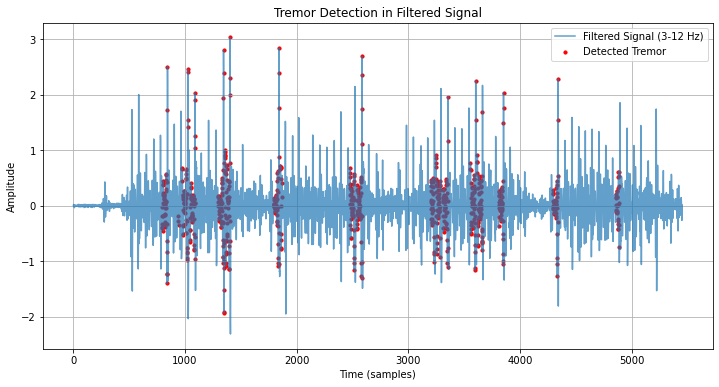

(763, 13.98973230656399)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

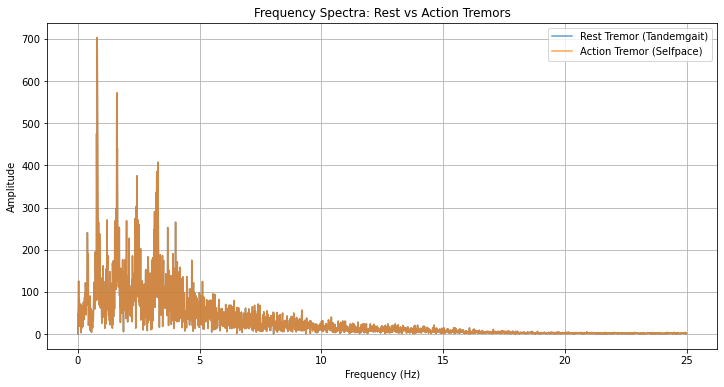

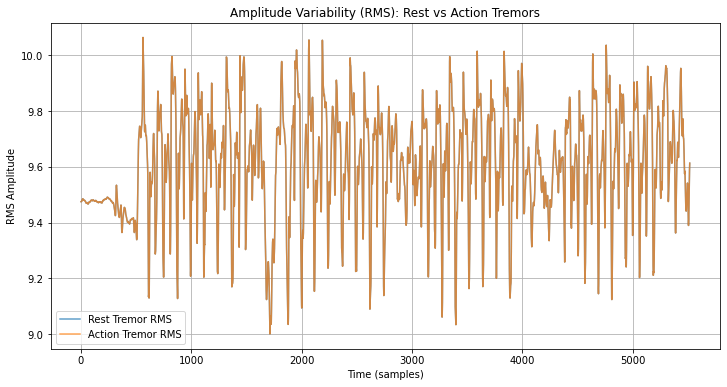

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


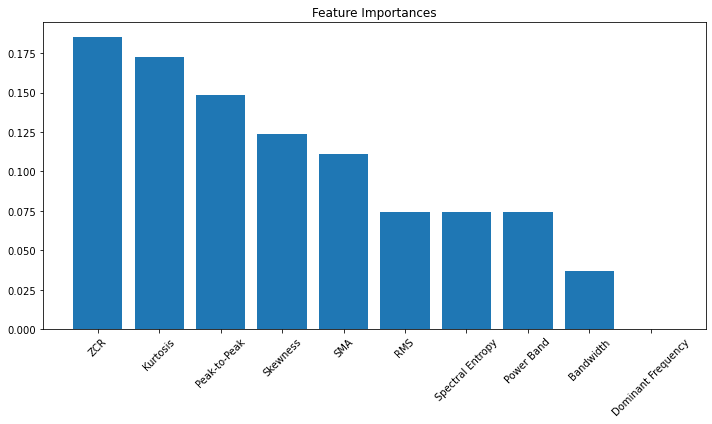

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('ZCR', 0.18518518518518517),
  ('Kurtosis', 0.17283950617283952),
  ('Peak-to-Peak', 0.14814814814814814),
  ('Skewness', 0.12345679012345678),
  ('SMA', 0.11111111111111109),
  ('Power Band', 0.07407407407407407),
  ('Spectral Entropy', 0.07407407407407407),
  ('RMS', 0.07407407407407407),
  ('Bandwidth', 0.037037037037037035),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS152_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

selfpace           tandemgait
0       LowerBack_Acc_X      LowerBack_Acc_X
1       LowerBack_Acc_Y      LowerBack_Acc_Y
2       LowerBack_Acc_Z      LowerBack_Acc_Z
3   LowerBack_FreeAcc_E  LowerBack_FreeAcc_E
4   LowerBack_FreeAcc_N  LowerBack_FreeAcc_N
..                  ...                  ...
79        Linsole:Acc_Y        Linsole:Acc_Y
80        Linsole:Acc_Z        Linsole:Acc_Z
81        Rinsole:Acc_X        Rinsole:Acc_X
82        Rinsole:Acc_Y        Rinsole:Acc_Y
83        Rinsole:Acc_Z        Rinsole:Acc_Z

[84 rows x 2 columns]

Executing cell:
# Select the dataset and relevant columns for analysis
selected_dataset_name = "selfpace"
selected_dataset = dataframes[selected_dataset_name]
# selected_dataset = pd.read_csv(file_name)
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z", "Linsole:Acc_Y"]

# Filter data for these columns, ensuring non-null values
imu_data = selected_dataset[imu_columns].dropna()

# Perform FFT for each axis
fft_results = {}
for column in imu_columns:
    # Remove mean to avoid DC component
    signal = imu_data[column] - imu_data[column].mean()
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/50)  # Assuming 50 Hz sampling rate
    
    # Keep only positive frequencies
    fft_results[column] = (freqs[freqs >= 0], np.abs(fft_result[freqs >= 0]))

# Plot FFT results
for column, (freqs, fft_values) in fft_results.items():
    plt.figure()
    plt.plot(freqs, fft_values)
    plt.title(f"Frequency Spectrum of {col

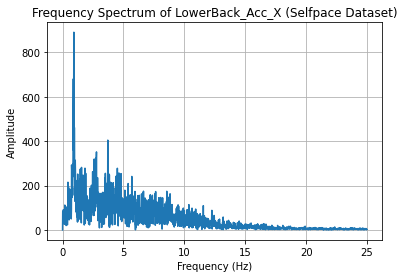

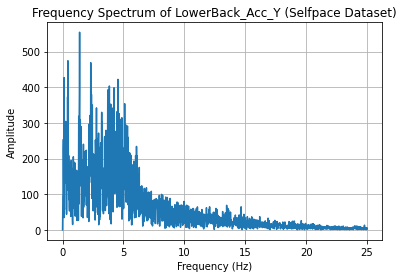

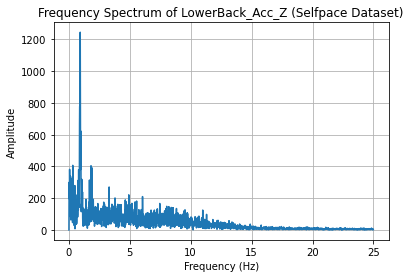

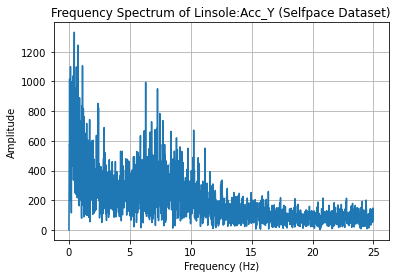

Executing cell:
# Define a function for moving RMS calculation
def moving_rms(signal, window_size):
    return np.sqrt(np.convolve(signal**2, np.ones(window_size)/window_size, mode='valid'))

# Select a signal for visualization ("LowerBack_Acc_X")
signal = imu_data["LowerBack_Acc_X"].values

# Calculate moving RMS with a window size of 50 samples (~1 second at 50 Hz)
window_size = 50  # 1 second
rms = moving_rms(signal, window_size)

# Calculate zero-crossing rate
zero_crossings = np.where(np.diff(np.sign(signal)))[0]

# Calculate signal magnitude area (SMA)
sma = np.sum(np.abs(signal))

# Visualize the raw signal, moving RMS, and zero-crossing points
plt.figure(figsize=(12, 6))

# Raw signal
plt.subplot(2, 1, 1)
plt.plot(signal, label="Raw Signal", alpha=0.7)
plt.scatter(zero_crossings, signal[zero_crossings], color='red', label="Zero-Crossings", s=10)
plt.title("Raw Signal and Zero-Crossings")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

# Moving 

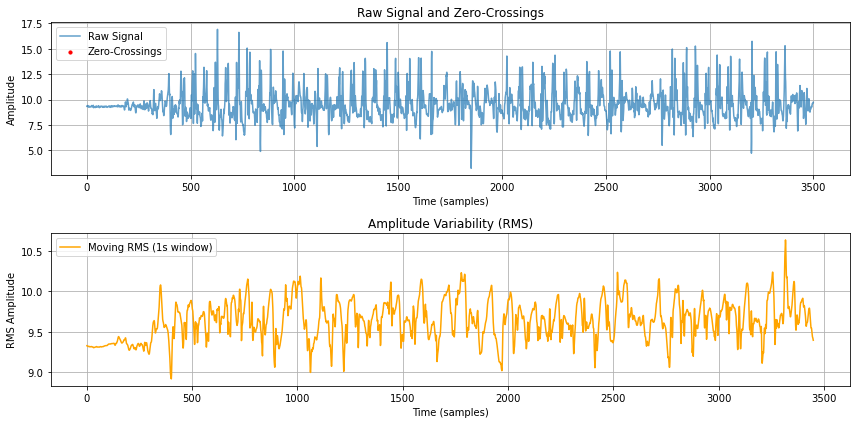

33371.374918999994

Executing cell:
# Define a band-pass filter
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters for the band-pass filter
lowcut = 3  # Lower bound of tremor frequency range (Hz)
highcut = 12  # Upper bound of tremor frequency range (Hz)
fs = 50  # Sampling frequency (Hz)

# Apply the band-pass filter to the signal
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)

# Compute moving RMS of the filtered signal
filtered_rms = moving_rms(filtered_signal, window_size)

# Determine threshold for tremor detection (e.g., RMS > mean + std)
rms_threshold = filtered_rms.mean() + filtered_rms.std()
tremor_indices = np.where(filtered_rms > rms_threshold)[0]

# Plot the filtered signal and highlight tremor regions
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal, label="Filtered Signal (3-12 Hz)", alp

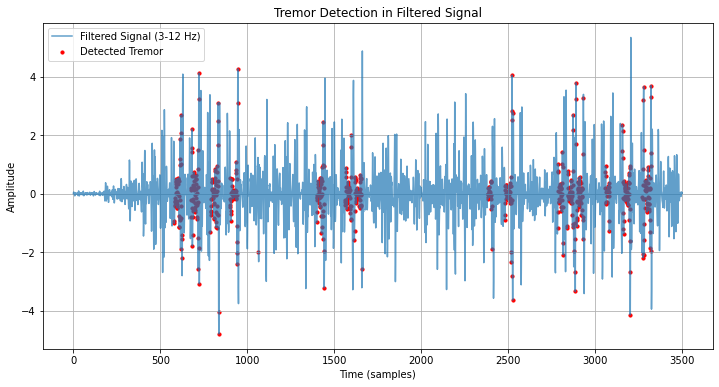

(629, 17.97142857142857)

Executing cell:
# Select datasets for rest (tandemgait) and action (selfpace)
rest_dataset = dataframes["tandemgait"]
action_dataset = dataframes["selfpace"]

# Select IMU signals for comparison
imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
rest_signals = rest_dataset[imu_columns].dropna()
action_signals = action_dataset[imu_columns].dropna()

# Define a function for FFT-based frequency analysis
def compute_fft(signal, fs=50):
    signal = signal - signal.mean()  # Remove mean
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), d=1/fs)
    positive_freqs = freqs[freqs >= 0]
    positive_amplitudes = np.abs(fft_result[freqs >= 0])
    return positive_freqs, positive_amplitudes

# Compute FFT for rest and action signals (X-axis as example)
rest_freqs, rest_amplitudes = compute_fft(rest_signals["LowerBack_Acc_X"].values)
action_freqs, action_amplitudes = compute_fft(action_signals["LowerBack_Acc_X"].values)

# Plot frequency spectra fo

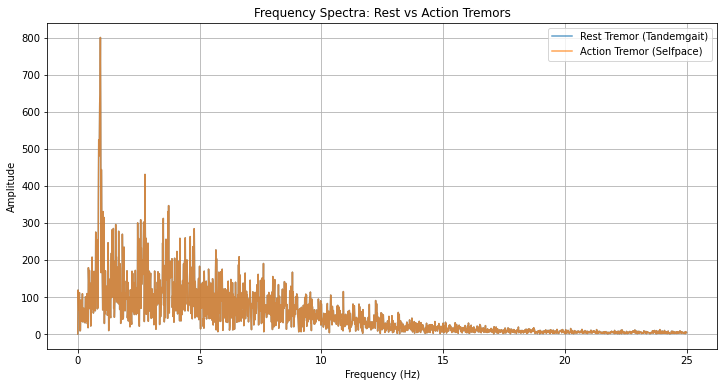

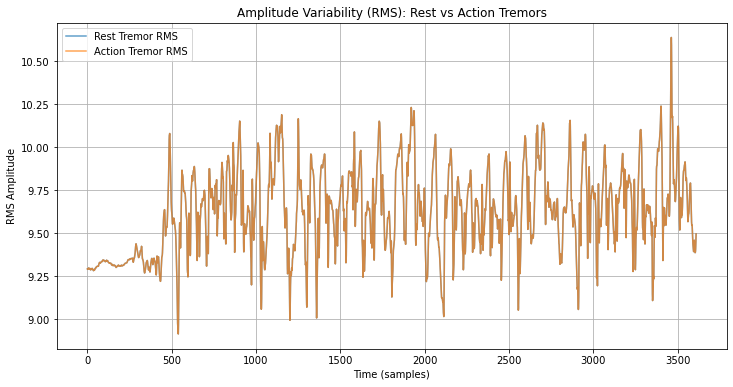

Executing cell:
# Define feature extraction function
def extract_features(signal, fs=50):
    """Extract features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    
    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    
    return [dominant_freq, power_band, rms, peak_to_peak, zcr]

# Prepare the dataset for modeling
def prepare_dataset(data, labels, imu_columns):
    """Extract features and prepare dataset."""
    feature_list = []
    label_list = []
    for i, column in enumerate(imu_columns):
        signal = data[column].dropna().values
        label = labels[i]  # Assign label (1 = tremor, 0 = no tremor)
        features = extract_features(signal)
        feature_list.append(features)
  

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
# Define a function to extract features from all datasets
def process_dataset_for_features(dataset, imu_columns, label):
    """Extract features for each column in the dataset."""
    feature_list = []
    label_list = []
    for column in imu_columns:
        if column in dataset.columns:
            signal = dataset[column].dropna().values
            features = extract_features(signal)  # Extract features
            feature_list.append(features)
            label_list.append(label)
    return np.array(feature_list), np.array(label_list)

# Combine features from all datasets
all_features = []
all_labels = []

for dataset_name, dataset in dataframes.items():
    if dataset_name in ["balance", "hurriedpace", "tandemgait", "tug", "selfpace"]:
        imu_columns = ["LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z"]
        # Assign labels based on the activity type (example: action = 1, rest = 0)
        if dataset_name in ["selfpace", "hurriedpace"]:
            

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:

# Extended feature extraction function
def extract_optimized_features(signal, fs=50):
    """Extract optimized features from a signal."""
    # Frequency-domain features
    freqs, amplitudes = compute_fft(signal, fs)
    dominant_freq = freqs[np.argmax(amplitudes)]
    power_band = np.sum(amplitudes[(freqs >= 3) & (freqs <= 12)])
    spectral_entropy = -np.sum((amplitudes / np.sum(amplitudes)) * np.log2(amplitudes / np.sum(amplitudes) + 1e-10))
    bandwidth = np.ptp(freqs[amplitudes > 0.1 * np.max(amplitudes)]) 

    # Time-domain features
    rms = np.sqrt(np.mean(signal**2))
    peak_to_peak = np.max(signal) - np.min(signal)
    zcr = np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)
    signal_sma = np.sum(np.abs(signal)) / len(signal)
    signal_skewness = skew(signal)
    signal_kurtosis = kurtosis(signal)

    return [dominant_freq, power_band, spectral_entropy, bandwidth, rms, peak_to_peak, zcr, signal_sma, signal_skewness, signal_kurtosis]

# Reprocess a

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Executing cell:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'max_features': ['sqrt', 'log2'],  # Features considered for splits
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
}

n_splits_desired = 5
adjusted_splits = 0
n_samples = len(X_train_opt)

if n_samples < n_splits_desired:
    print(f"Skipping file due to insufficient samples.")
else:
    # Get the smallest class size in the target variable
    class_counts = np.bincount(y_train_opt)
    min_class_size = np.min(class_counts[class_counts > 0])

    # Adjust cv to the minimum of desired splits, total samples, and smallest class size
    adjusted_splits = min(n_splits_desired, n_samples, min_class_size)

    print(f"Using adjusted cv = {adjusted_splits} for GridSearchCV.")

    # Initialize the random forest model
    rf_model = RandomForestClassifier(random_state=42)

    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

({'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},
 0.8333333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       0.0\n           1       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 array([[0, 0],
        [2, 0]]))

Executing cell:
feature_names = ["Dominant Frequency", "Power Band", "Spectral Entropy", "Bandwidth", 
                 "RMS", "Peak-to-Peak", "ZCR", "SMA", "Skewness", "Kurtosis"]
importances = best_rf_model_simplified.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


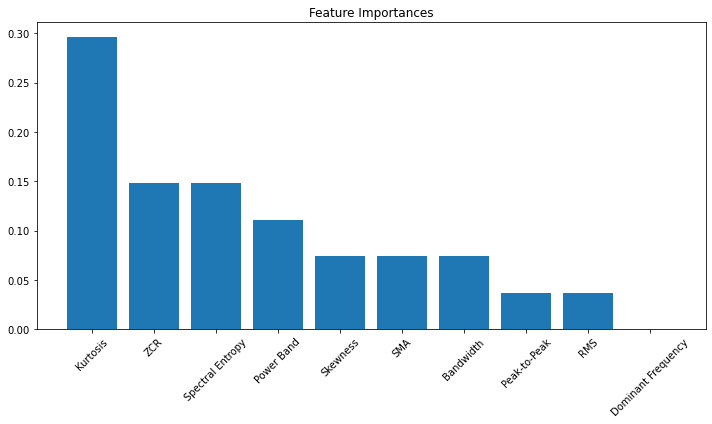

Executing cell:
if adjusted_splits < 2:
    print(f"Insufficient splits: adjusted_splits = {adjusted_splits}. Skipping cross-validation.")
else:
    # Perform cross-validation
    cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.2f}")

# cv_scores = cross_val_score(best_rf_model_simplified, X_optimized, y_optimized, cv=adjusted_splits, scoring='accuracy')
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean accuracy: {cv_scores.mean():.2f}")
Insufficient splits: adjusted_splits = 0. Skipping cross-validation.
Executing cell:
# Evaluate the model's performance metrics and interpret its effectiveness

# Accuracy, Precision, Recall, F1-Score
evaluation_report = classification_report(y_test_opt, y_pred_simplified, target_names=["Non-Tremor", "Tremor"])
print("#######################################################

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share

{'Evaluation Report': '              precision    recall  f1-score   support\n\n  Non-Tremor       0.00      0.00      0.00       0.0\n      Tremor       0.00      0.00      0.00       2.0\n\n    accuracy                           0.00       2.0\n   macro avg       0.00      0.00      0.00       2.0\nweighted avg       0.00      0.00      0.00       2.0\n',
 'Confusion Matrix': array([[0, 0],
        [2, 0]]),
 'Feature Importance': [('Kurtosis', 0.29629629629629634),
  ('Spectral Entropy', 0.14814814814814817),
  ('ZCR', 0.14814814814814817),
  ('Power Band', 0.11111111111111112),
  ('Bandwidth', 0.07407407407407408),
  ('SMA', 0.07407407407407408),
  ('Skewness', 0.07407407407407408),
  ('RMS', 0.03703703703703704),
  ('Peak-to-Peak', 0.03703703703703704),
  ('Dominant Frequency', 0.0)]}

Processing file: synapse_data/Version_1/pd_participants/csv_files/NLS153_SelfPace.csv
Executing cell:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.model_selection import GridSearchCV

Executing cell:

# Load the provided files to understand their structure
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurriedpace": "hc100_hurriedpace.csv",
#     "hurriedpace_mat": "hc100_hurriedpace_mat.csv",
#     "selfpace": "hc100_selfpace.csv",
#     "selfpace_mat": "hc100_selfpace_mat.csv",
#     "selfpace_matturn": "hc100_selfpace_matturn.csv",
#     "tandemgait": "hc100_tandemgait.csv",
#     "tug": "hc100_tug.csv"
# }

# Read all files into dataframes
dataframes = {}
# for n

In [ ]:
# List all files you want to process (adjust path and file pattern as needed)


# Load the notebook
notebook_path = "tremor_detection.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# List of CSV files to process
# csv_files = [
#     "hc100_selfpace.csv",
#     "HC101_SelfPace.csv"
# ]

# Initialize results list
all_res = []

# Get the current IPython shell
ipython = get_ipython()

# Process each CSV file
for csv_file in csv_files:
    print(f"Processing file: {csv_file}")
    
    # Inject the file_name variable into the IPython environment
    ipython.run_cell(f"file_name = '{csv_file}'")
    ipython.run_cell(f"tandemgait_file_name = '{csv_file}'")
    
    # Execute each cell in the notebook
    for cell in nb.cells:
        if cell.cell_type == "code":
            try:
                print(f"Executing cell:\n{cell.source}")
                ipython.run_cell(cell.source)  # Execute the cell's code
            except Exception as e:
                print(f"Error executing cell: {e}")
    
    # After executing the notebook, save results (modify this based on your notebook logic)
    # Assuming the last cell appends or processes something into a results variable
    ipython.run_cell("""
# Extract processed data from the current file (this depends on your notebook logic)
result_summary = {
    "file": file_name,
    "data": final_tremor_res  # Replace with actual processed data
}
all_res.append(result_summary)
""")

# Print the collected results
print("Processing completed for all files.")
print("Results:", all_res)


In [ ]:
all_res

In [ ]:
import json
import numpy as np

# Function to convert non-serializable objects to serializable ones
def make_serializable(obj):
    if isinstance(obj, np.ndarray):  # Convert numpy arrays to lists
        return obj.tolist()
    elif isinstance(obj, list):  # Recursively process lists
        return [make_serializable(item) for item in obj]
    elif isinstance(obj, dict):  # Recursively process dictionaries
        return {key: make_serializable(value) for key, value in obj.items()}
    else:  # Return the object as-is if it's already serializable
        return obj

# Convert the result to a serializable format
serializable_result = make_serializable(all_res)

# Save to a JSON file
with open('parkinson_tremor_data.json', 'w') as f:
    json.dump(serializable_result, f, indent=4)
